# Analysis
In this notebook I analyze all the data collected through the iterations for the reinforcement TICA 

### Import needed modules and useful functions

In [19]:
#-- useful python script for training the DeepTICA cvs --#
from utils import *

#-- to not visualize warnings --#
import warnings
warnings.filterwarnings('ignore')

### Simulation parameters 

In [20]:
iterations = 25 # non è arrivato fino al 30. Errore con la Barrier

kb=0.008314
#-- SIMULATION PARAMETERS --#
sim_parameters = {
    'temp':300, 
    'beta': 1./(300*kb),
    'kbt': None,
    #-- parameters to compute the fes --#
    'blocks':2,
    'bandwidth': 0.02,
    'plot_max_fes' :70,
}
#--------------------------------------#

### Results
- *restart/all\_data\_shuffle* è arrivato fino alla 25. CUDA FULL *da rilanciare*
- *restart/all\_data* è arrivato fino alla 20. CUDA FULL, *da rilanciare*
- *10\_sim* andata, no successo
- *10\_sim\_shuffle* andata, no successo
- *restart/all\_data\_shuffle\_Micheletime* -> da lanciare
- *restart/all\_data\_Micheletime* -> da lanciare

In [21]:
List =[]
root = "restart/all_data_shuffle/"
folder = root+"unbias_A/"
for i in range(1,iterations):
    List.append(folder)
    folder += "bias"+str(i)+"/"
List.append(folder)

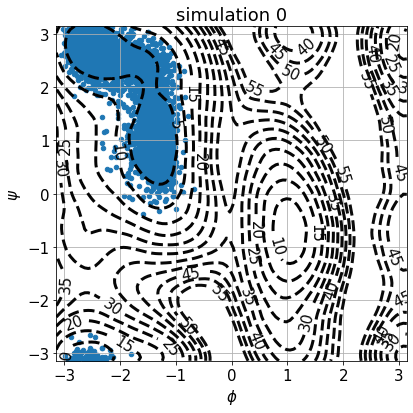

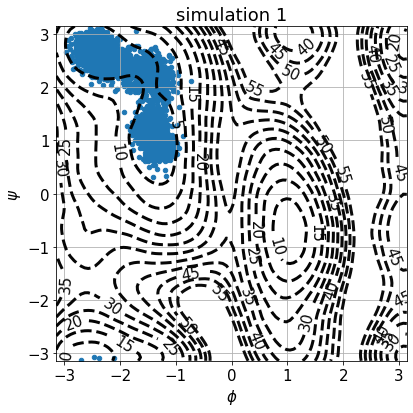

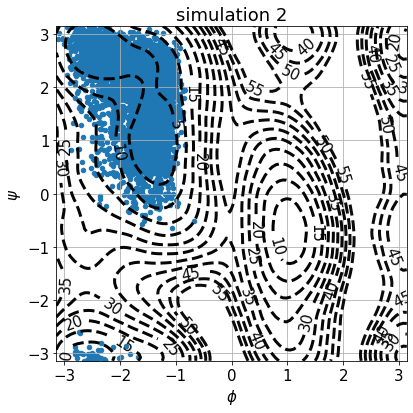

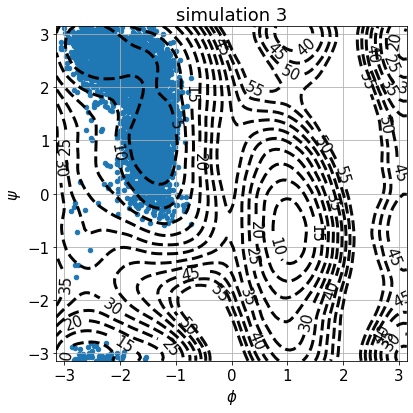

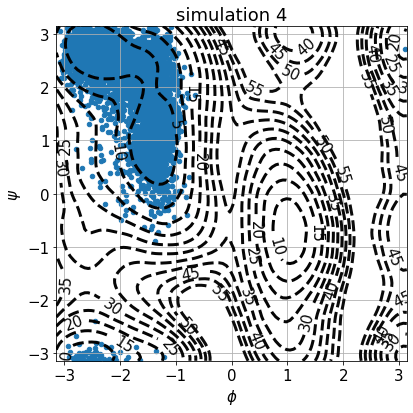

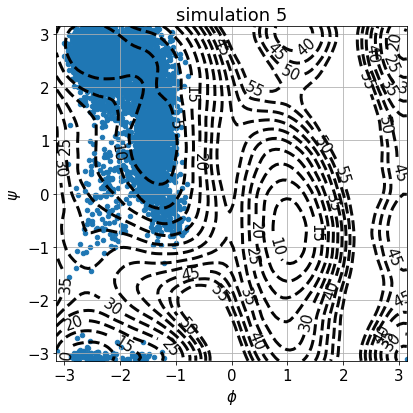

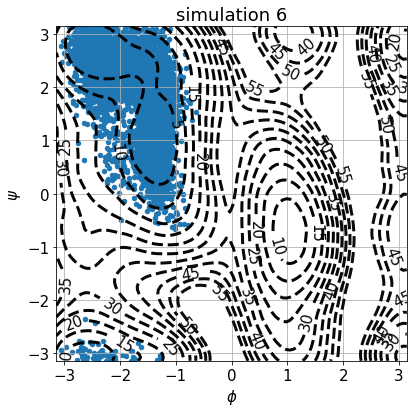

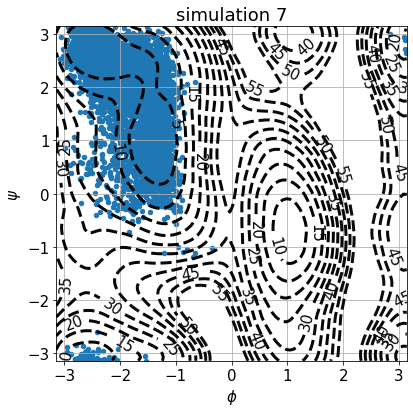

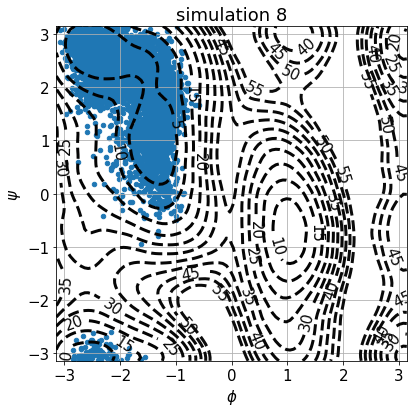

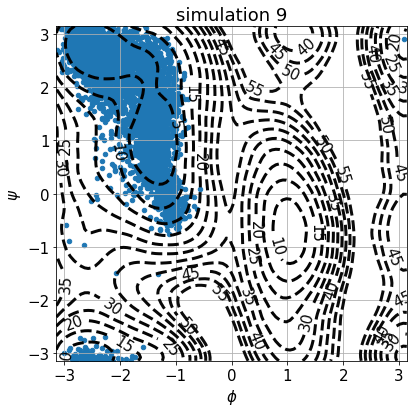

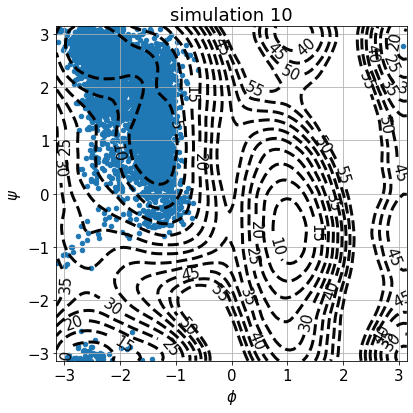

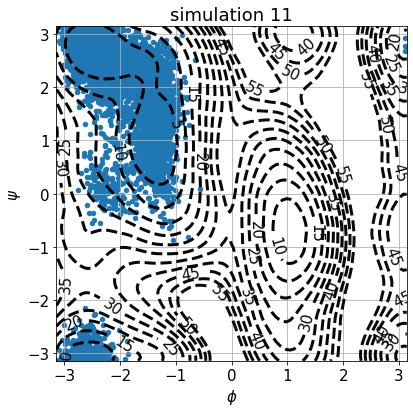

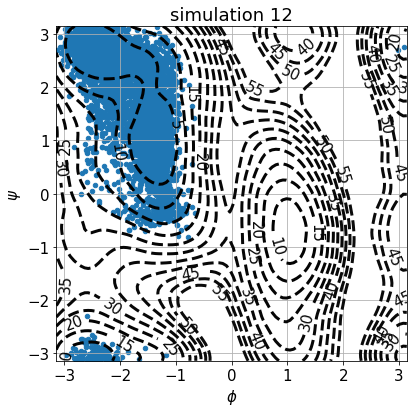

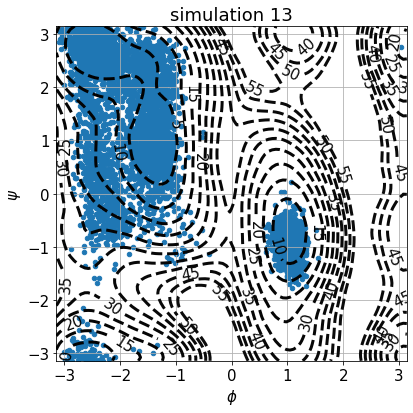

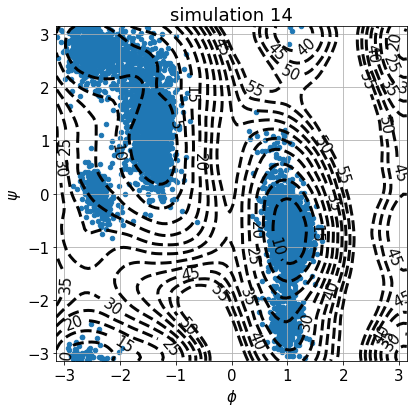

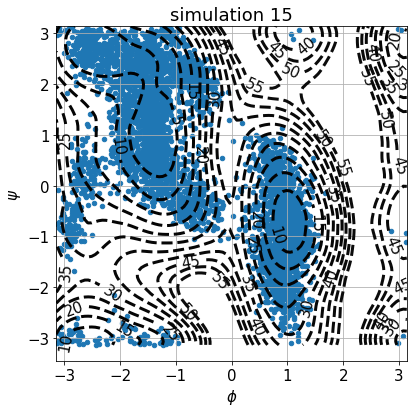

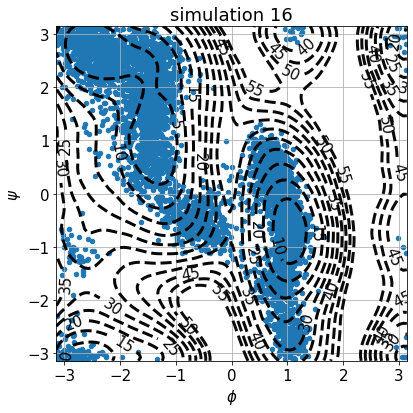

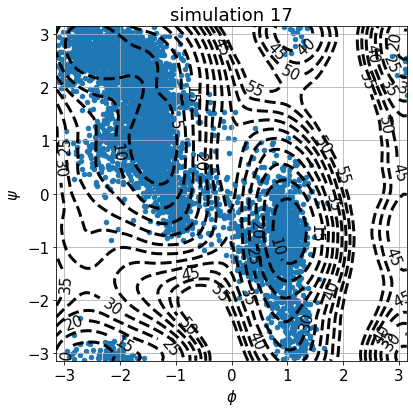

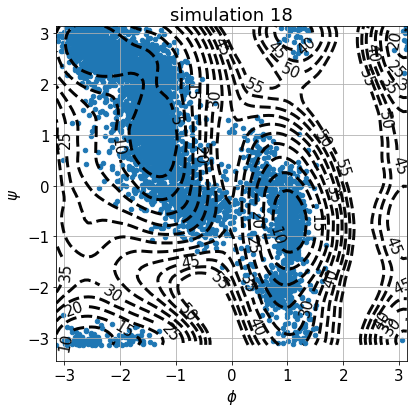

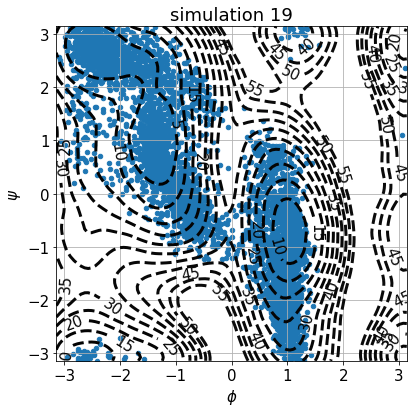

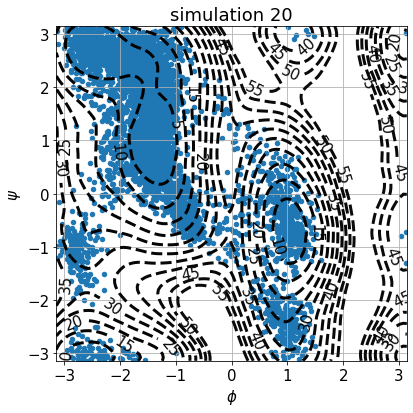

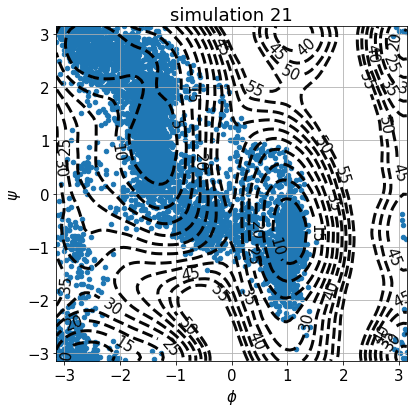

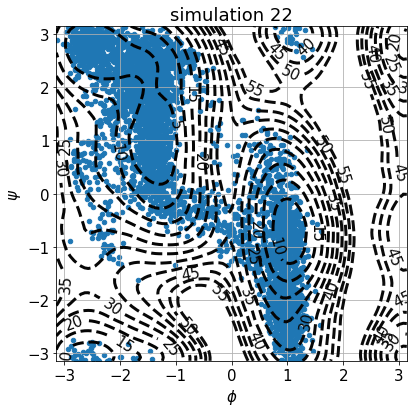

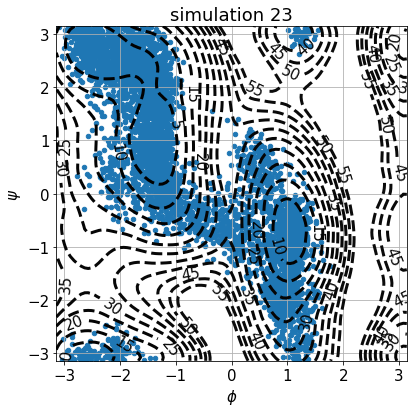

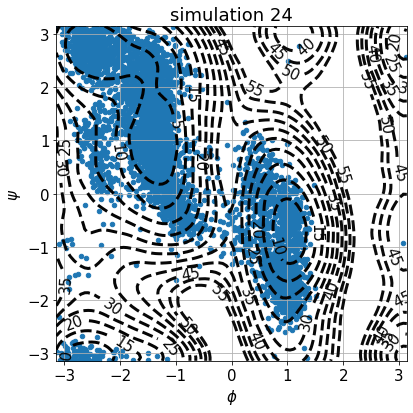

In [22]:
#fig,ax = plt.subplots(1,1,figsize=(10,8))
#color = ["b","r","g","orange"]
for k,set in enumerate(List):

    fig,ax = plt.subplots(1,1,figsize=(6,6))
    data = load_dataframe(set+"COLVAR") 
    descriptors_names = data.filter(regex='^d[^a-z]').columns.values 
    #data.plot.scatter(y="psi",x="phi",ax=ax,c=color[k])
    data.plot.scatter(y="psi",x="phi",ax=ax)

    fes = np.loadtxt("../../../angles/fes.txt",delimiter=" ")
    grid0 = np.loadtxt("../../../angles/grid0.txt",delimiter=" ")
    grid1 = np.loadtxt("../../../angles/grid1.txt",delimiter=" ")
    bounds = np.arange(0, 60, 5.)
    c = ax.contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c.clabel()
    ax.grid()
    ax.set_title("simulation "+str(k))
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    plt.tight_layout()

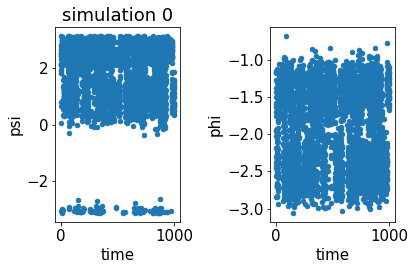

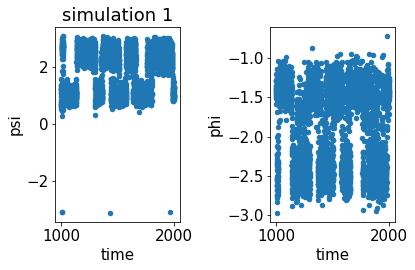

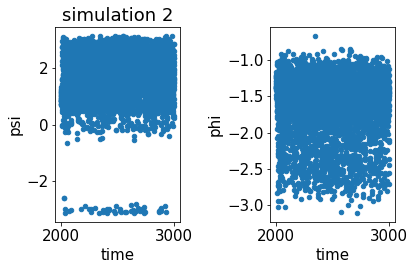

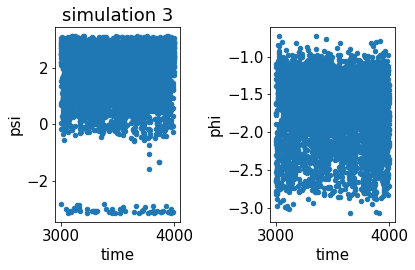

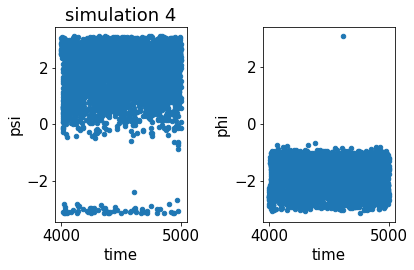

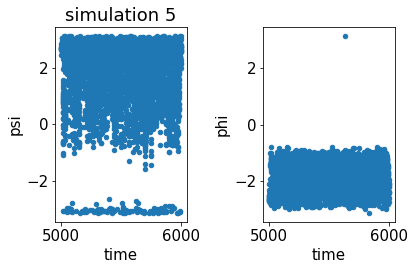

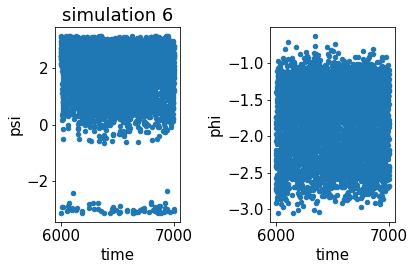

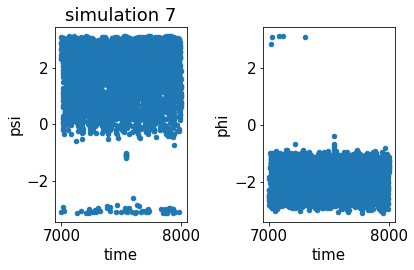

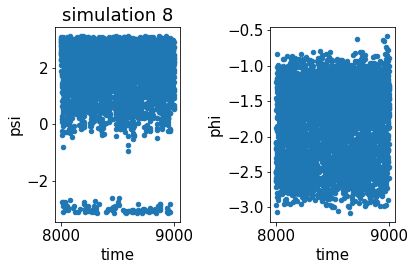

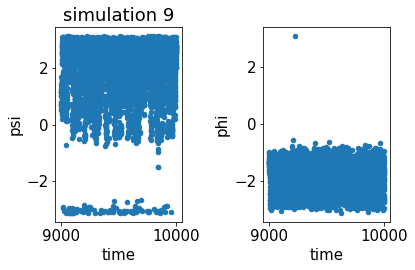

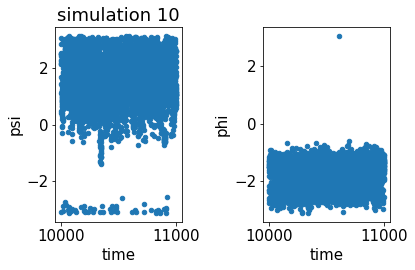

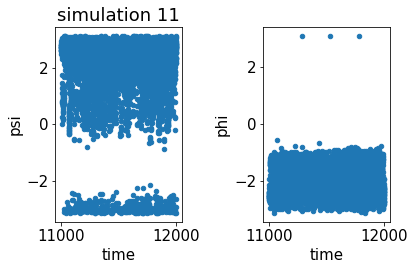

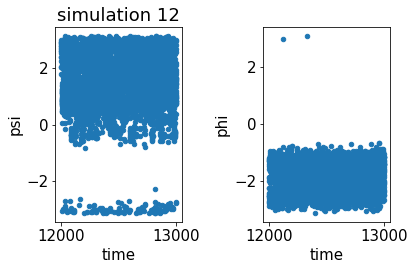

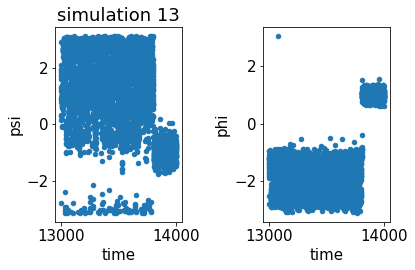

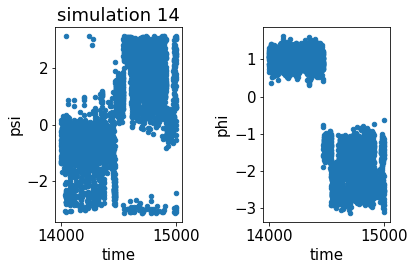

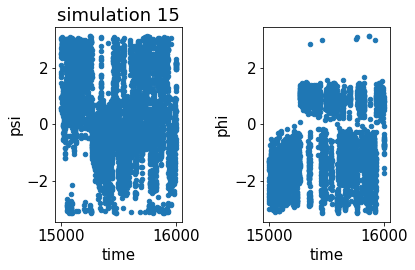

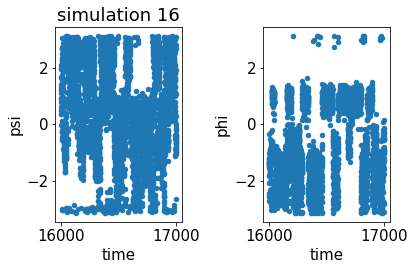

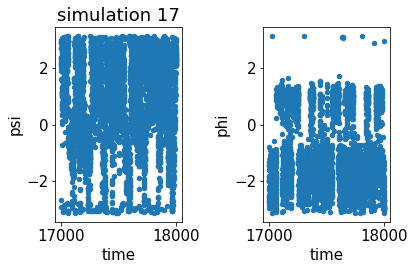

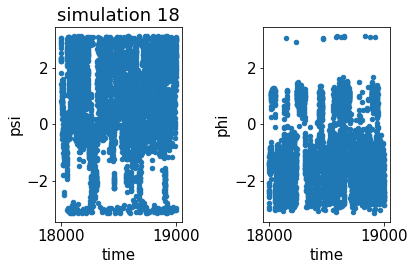

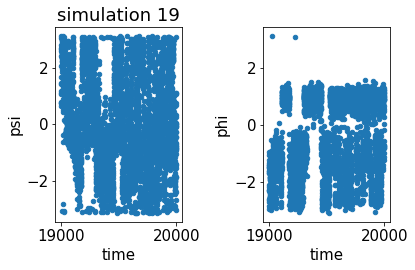

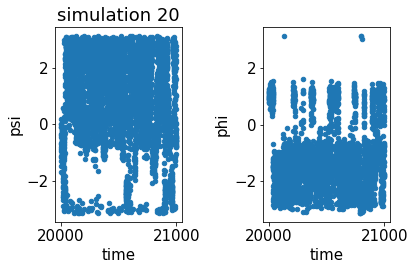

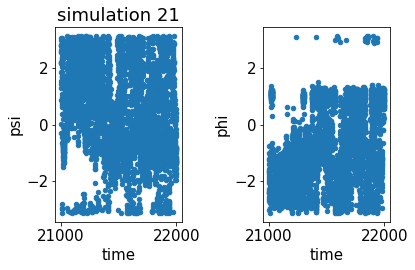

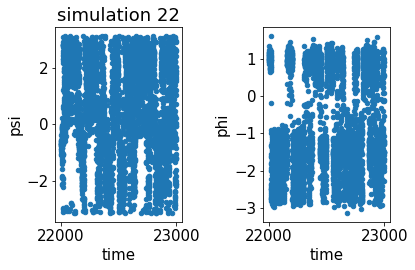

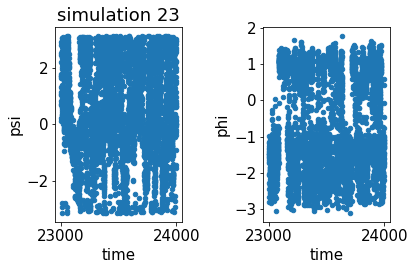

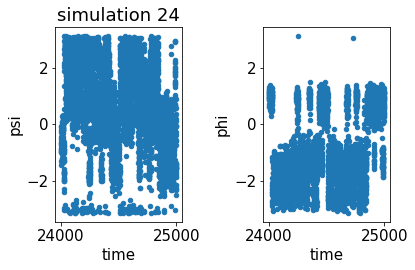

In [23]:
#fig,axs = plt.subplots(1,2,figsize=(16,6))
for k,set in enumerate(List):
    fig,axs = plt.subplots(1,2,figsize=(6,4))
    data = load_dataframe(set+"COLVAR")
    data.plot.scatter(x="time",y="psi",ax=axs[0])#, color=color[k])
    data.plot.scatter(x="time",y="phi",ax=axs[1])#, color=color[k])

    axs[0].set_title("simulation "+str(k))
    plt.tight_layout()

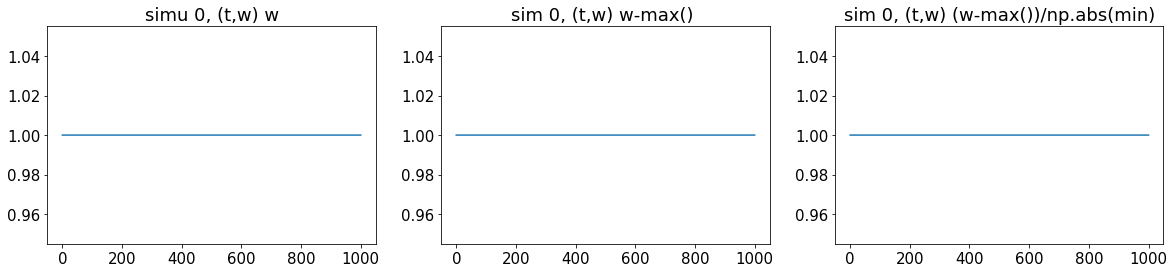

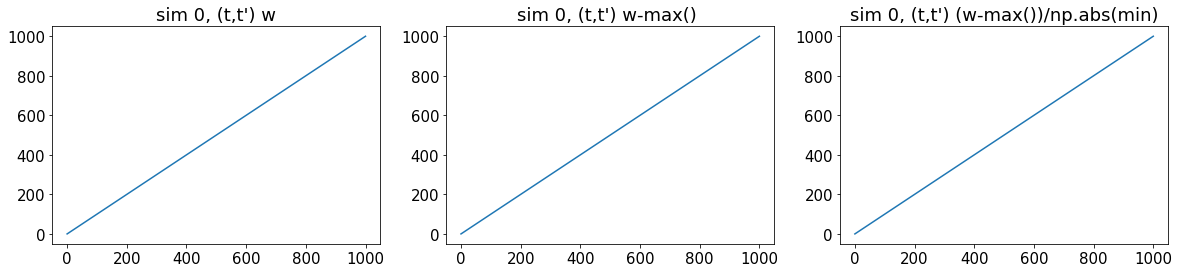

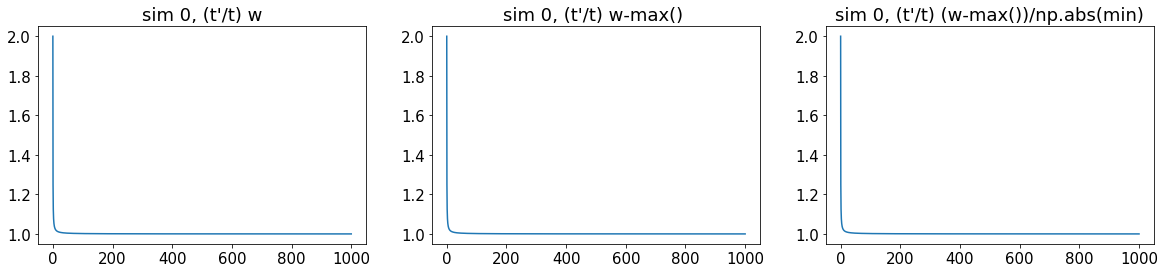

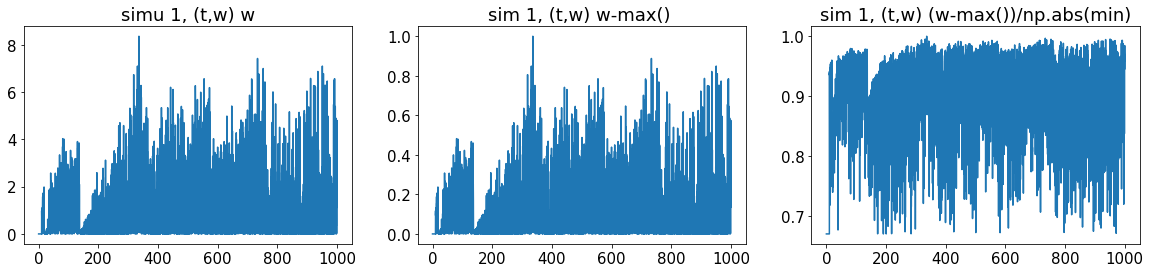

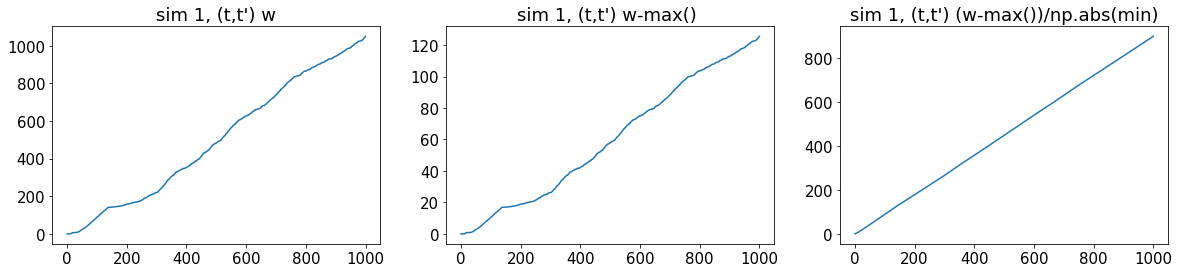

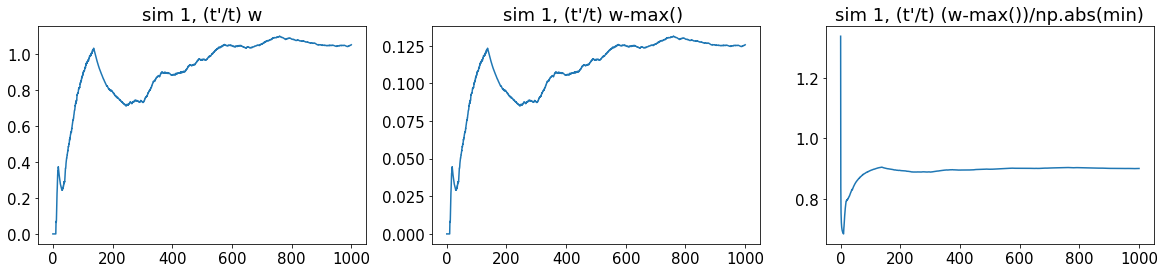

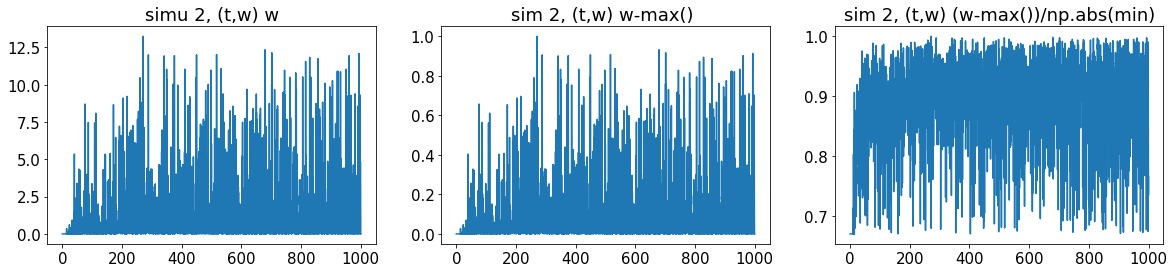

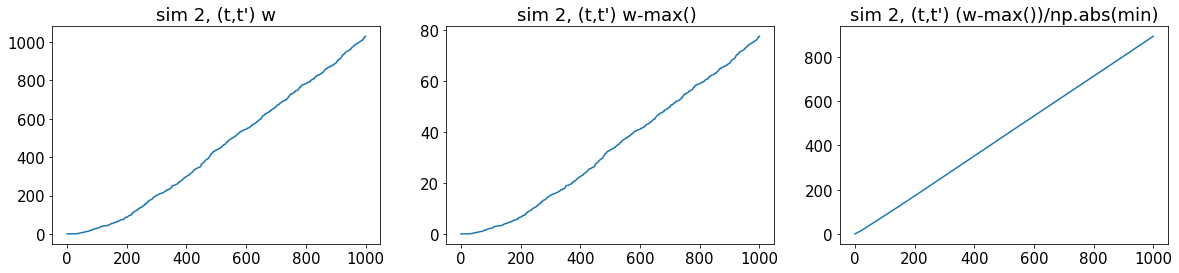

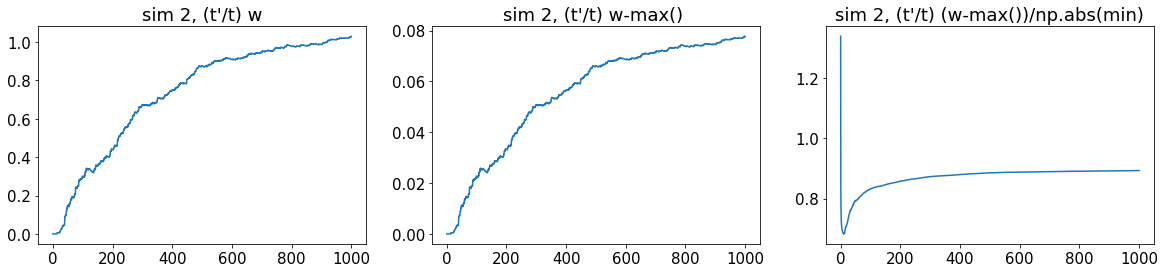

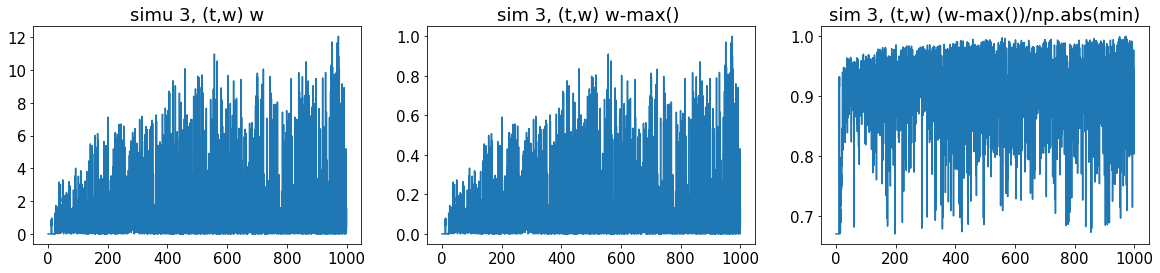

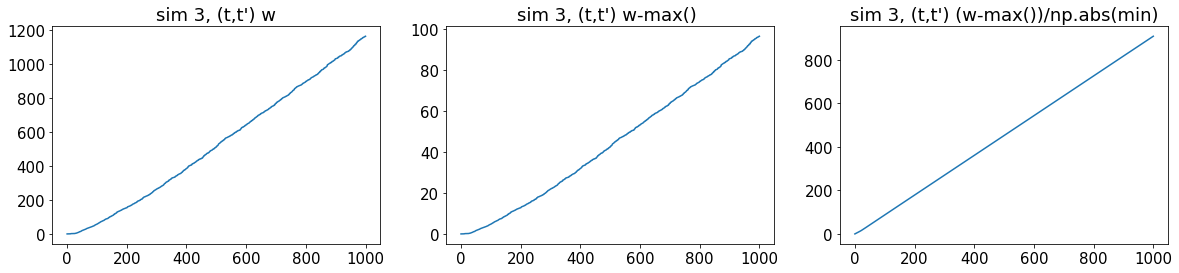

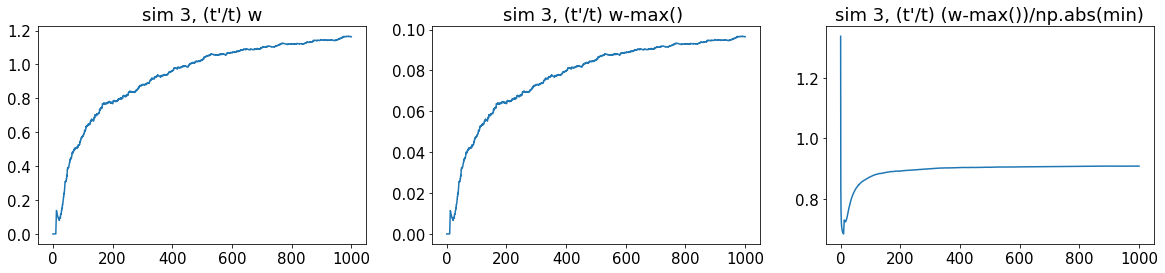

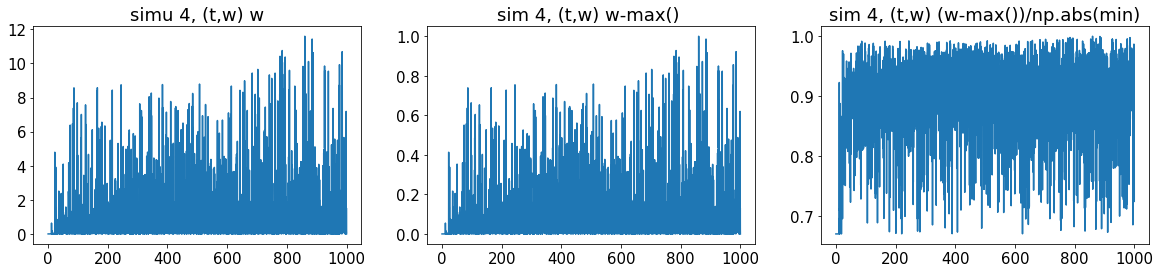

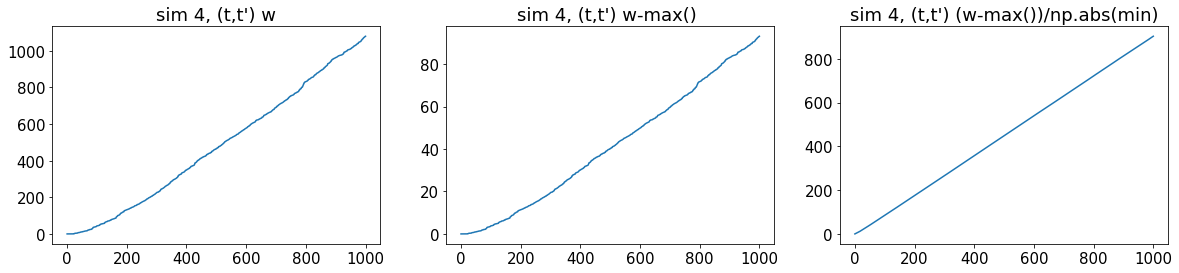

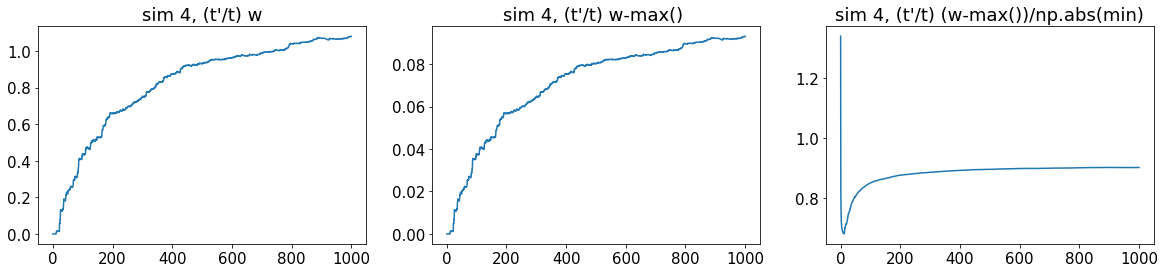

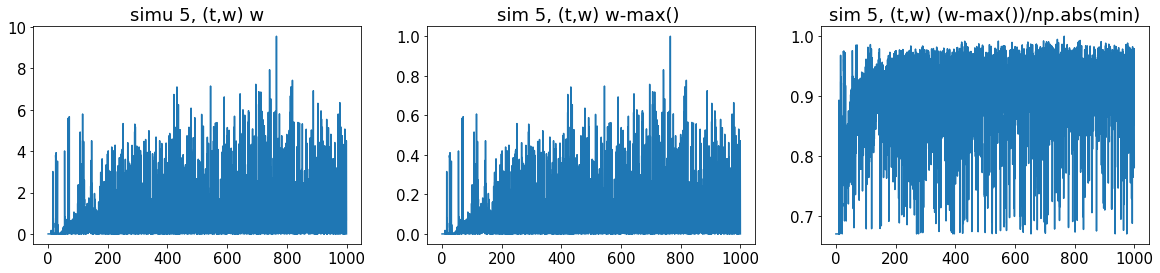

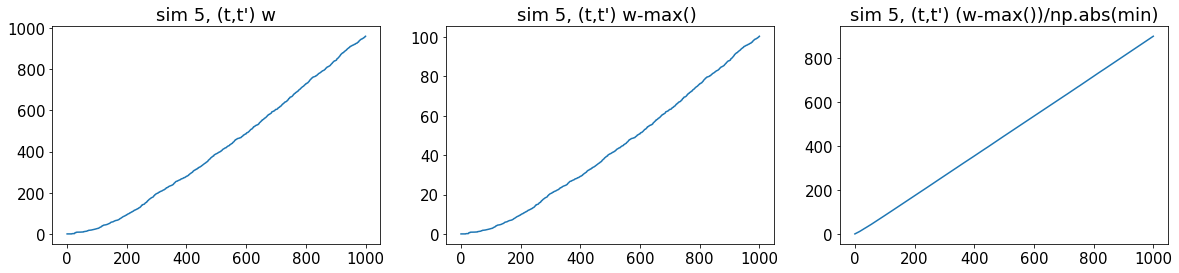

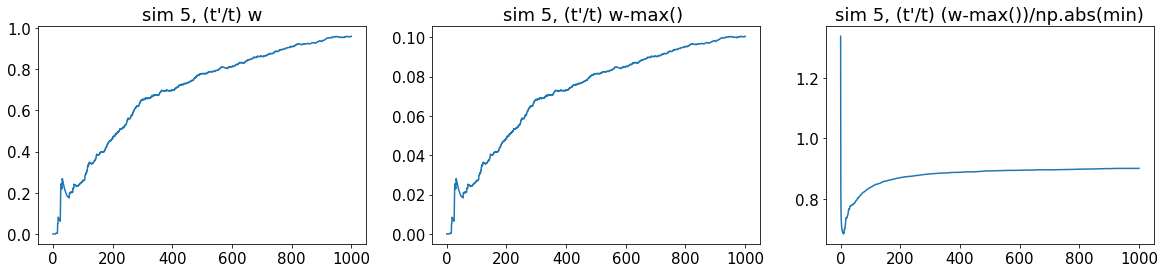

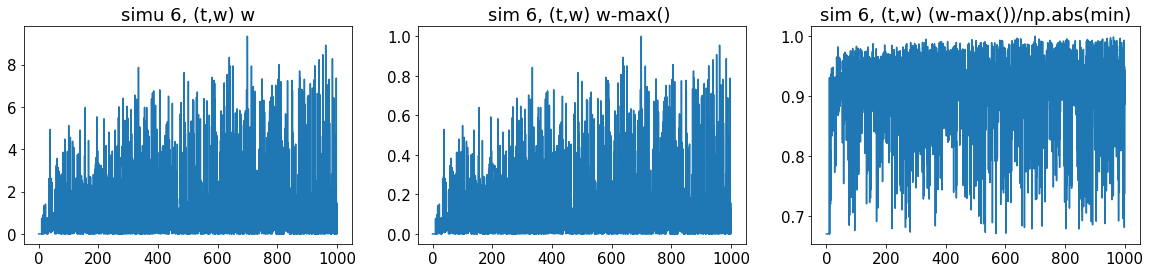

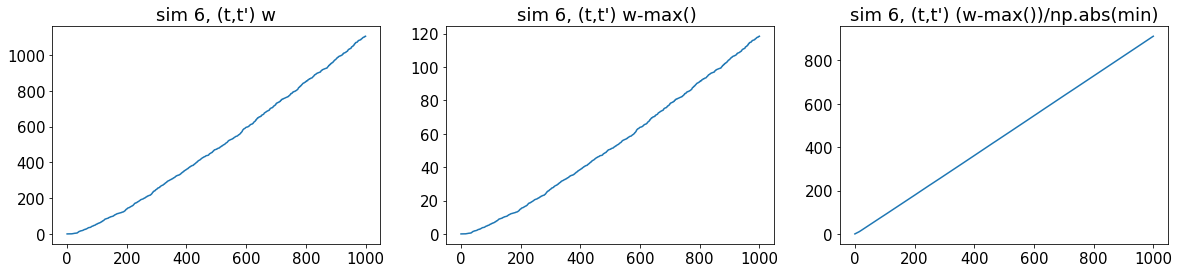

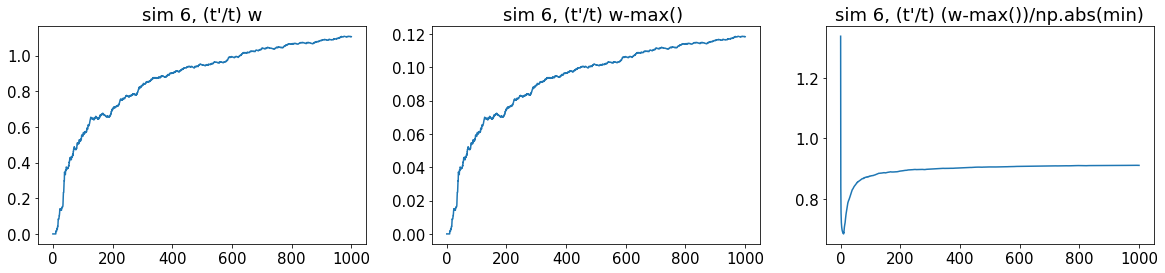

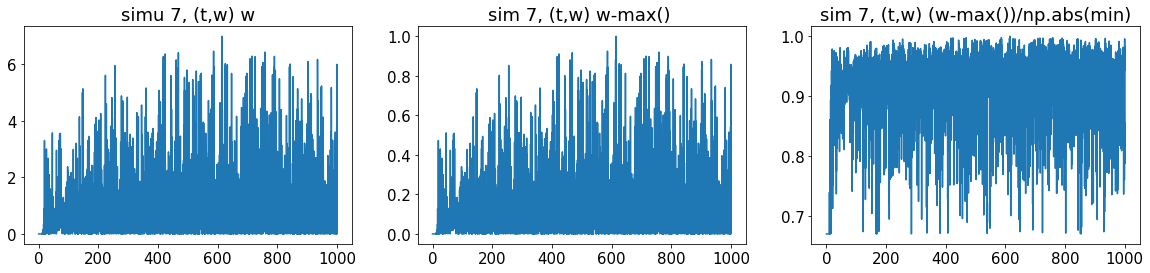

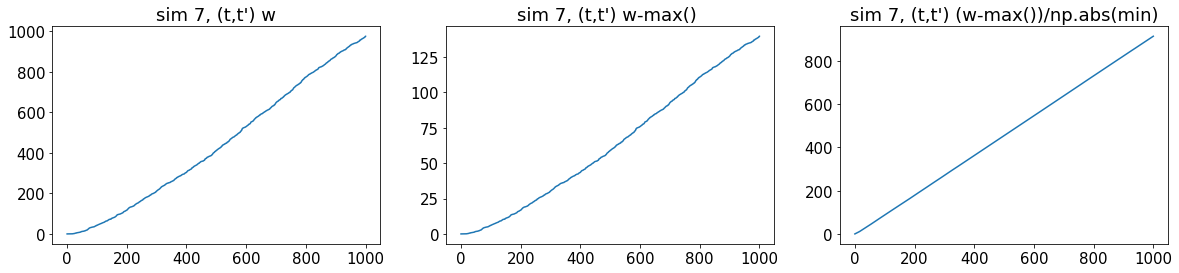

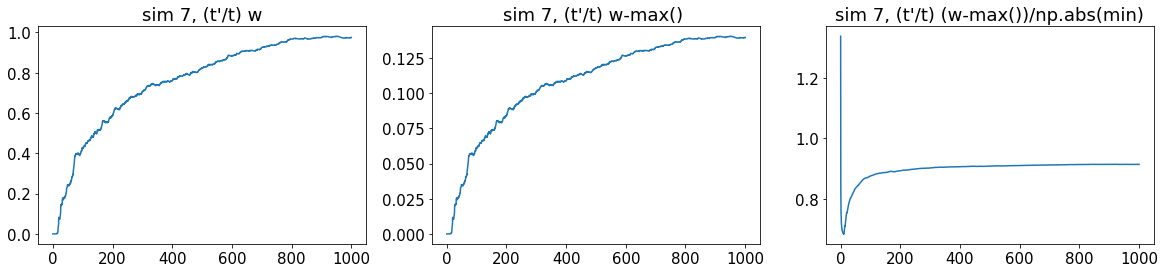

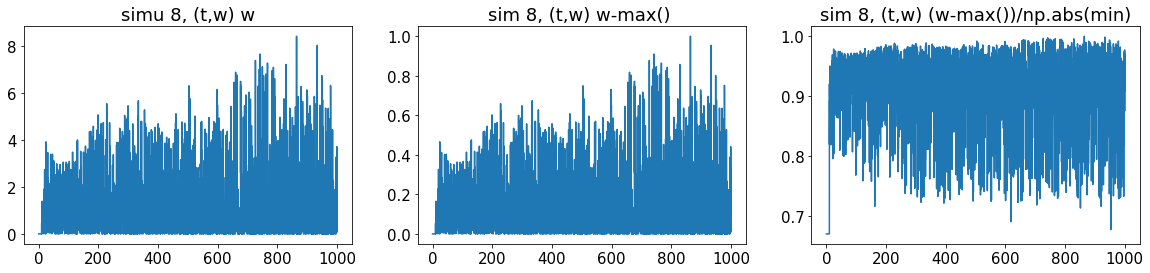

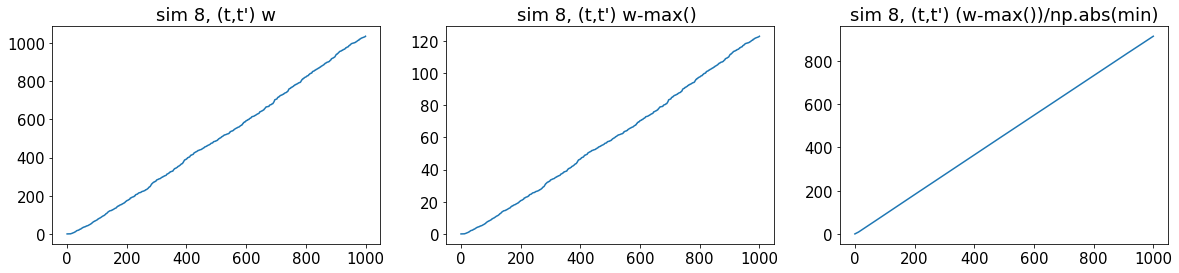

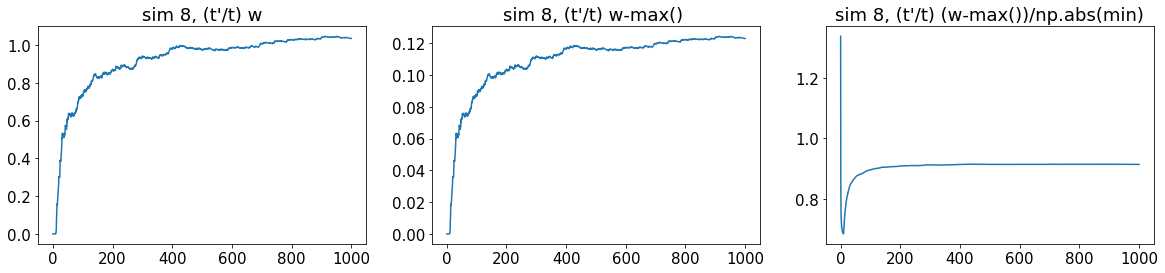

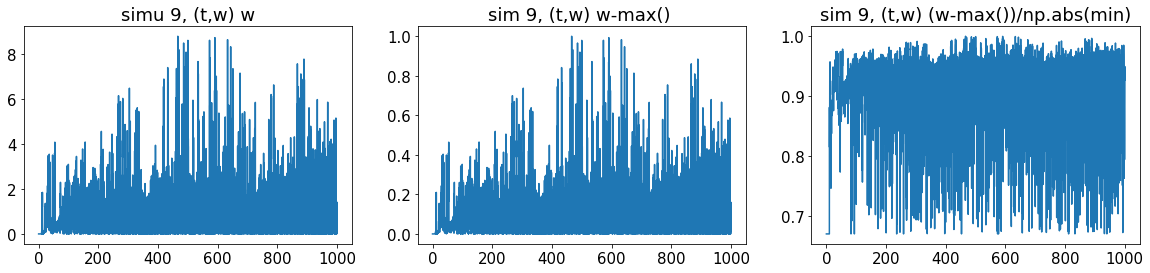

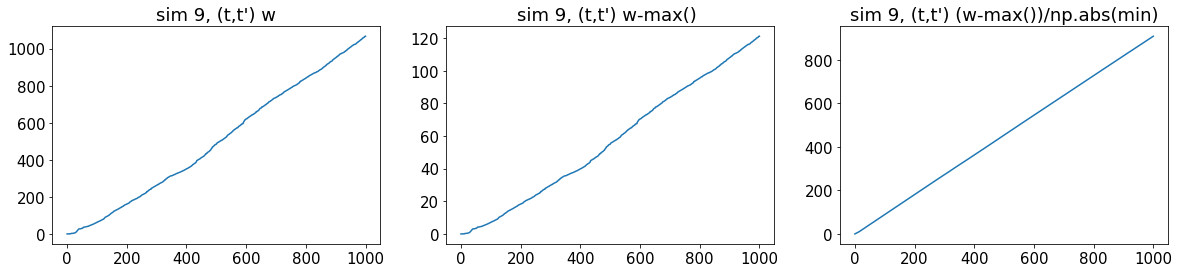

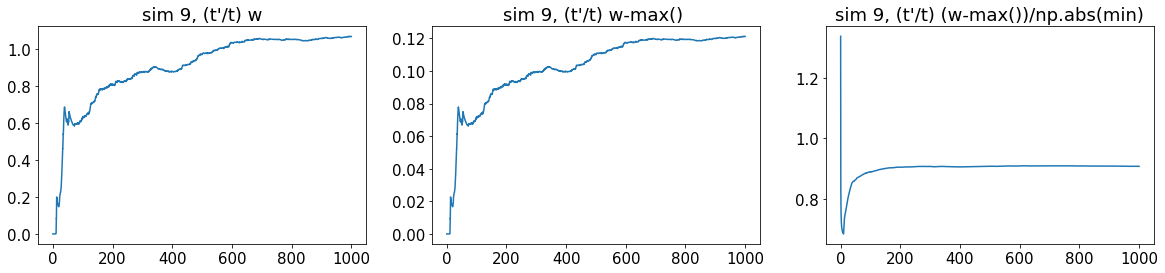

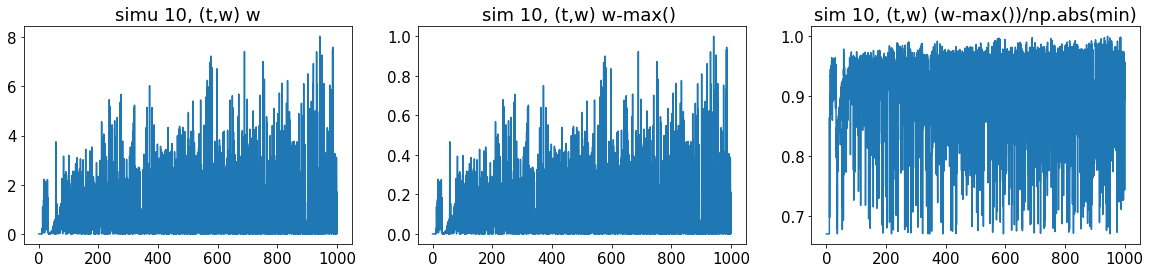

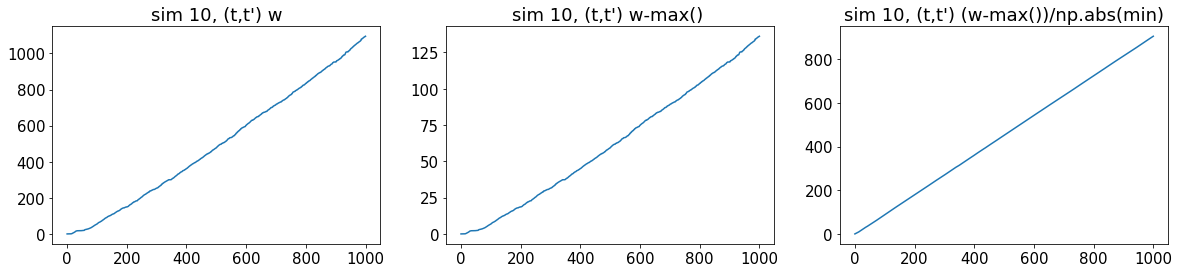

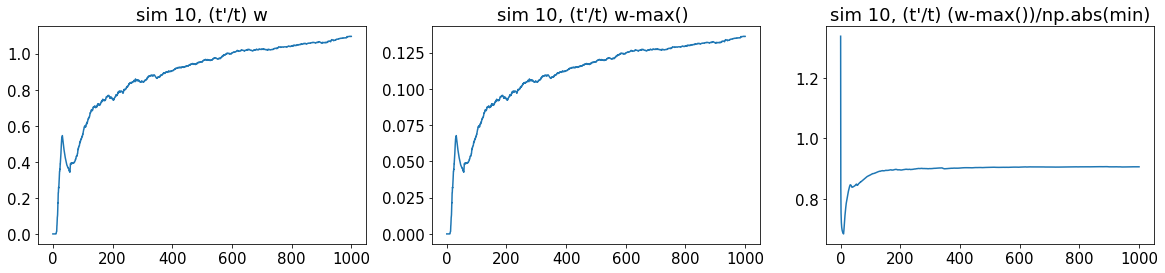

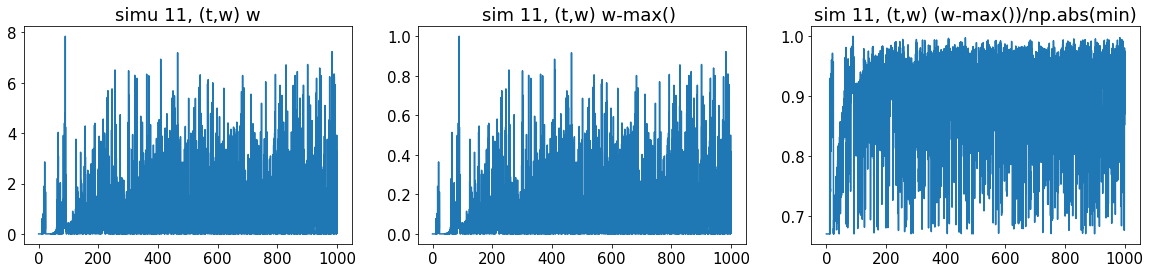

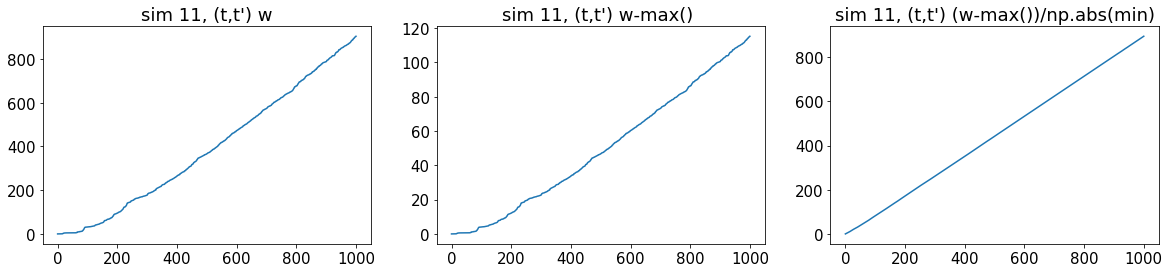

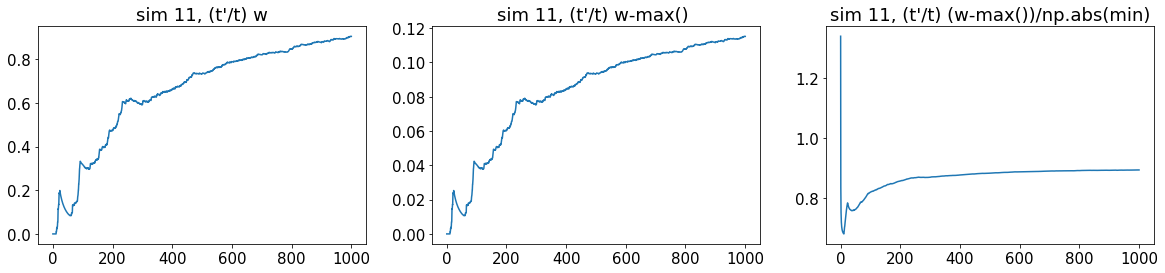

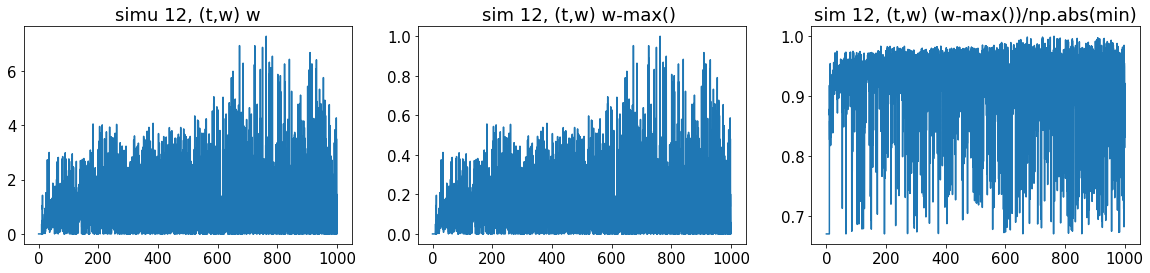

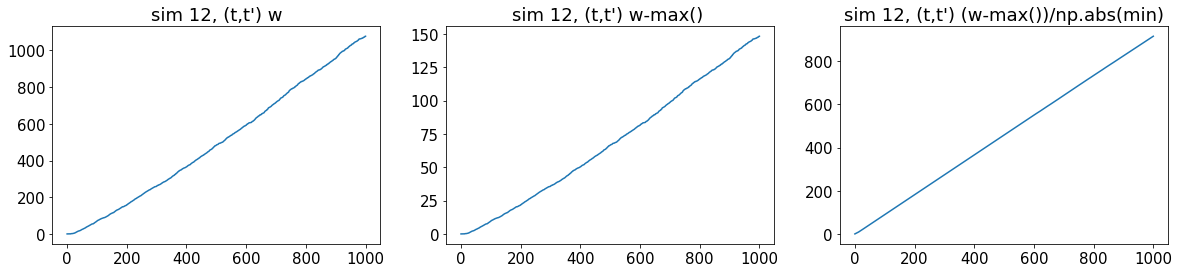

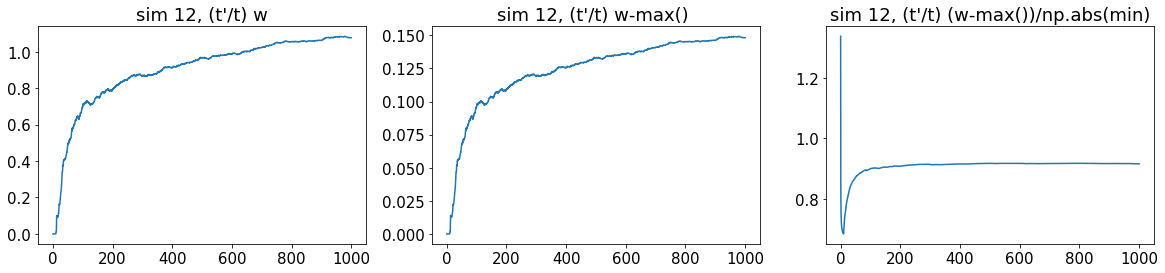

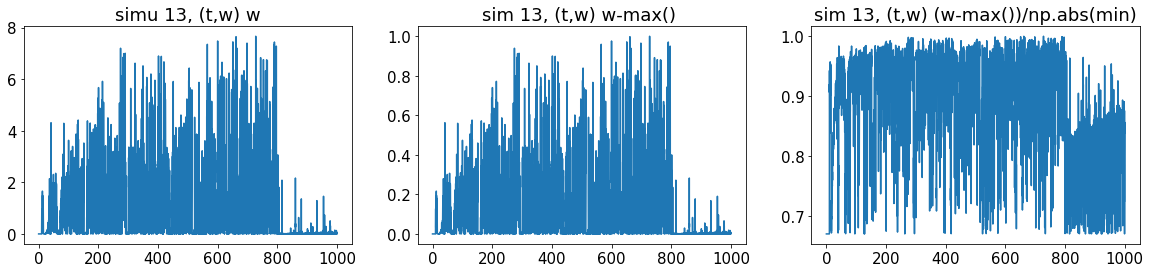

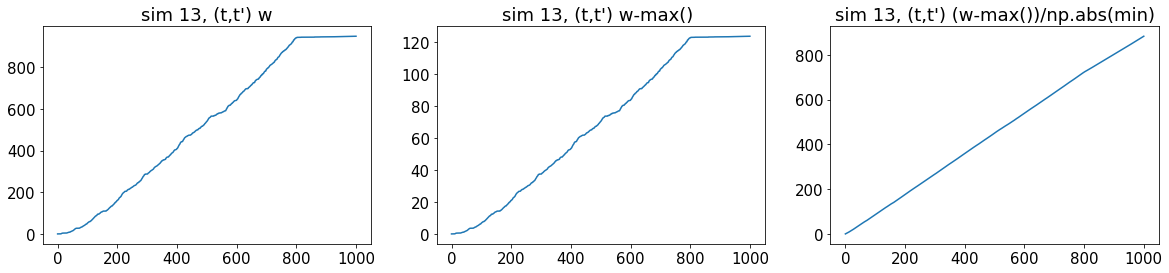

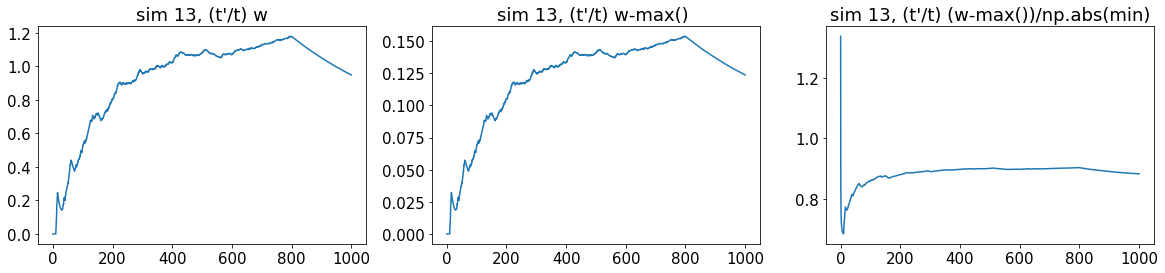

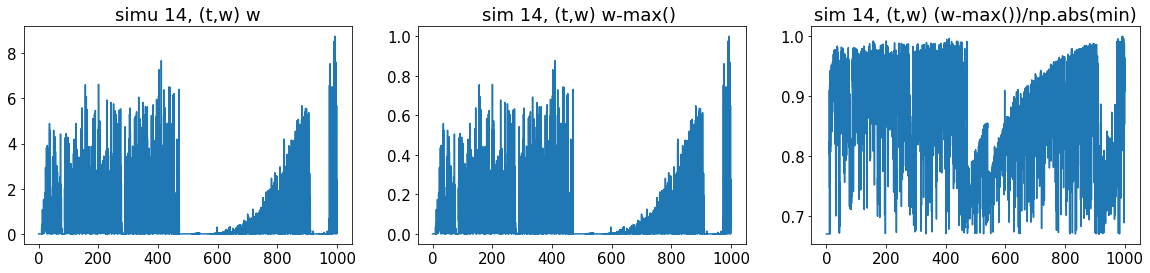

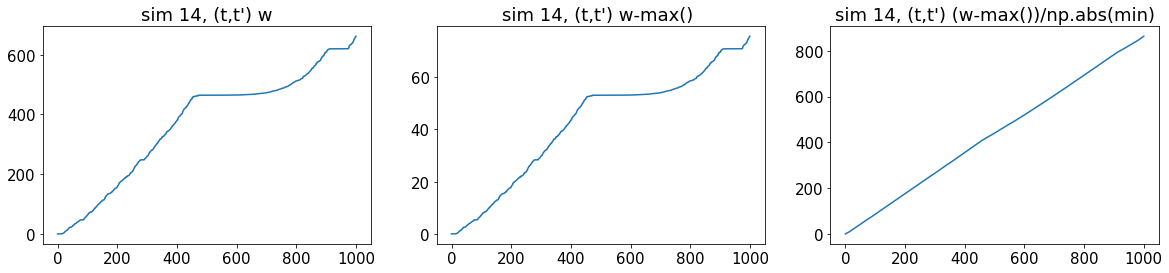

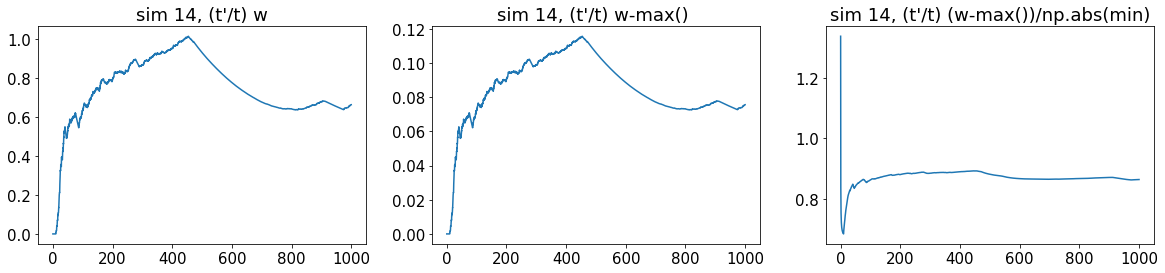

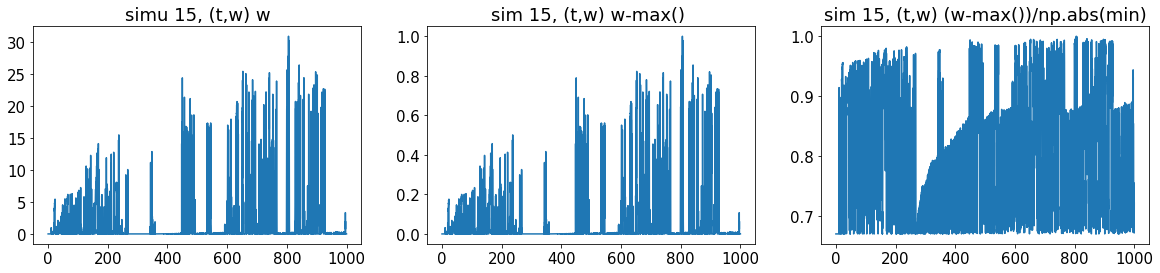

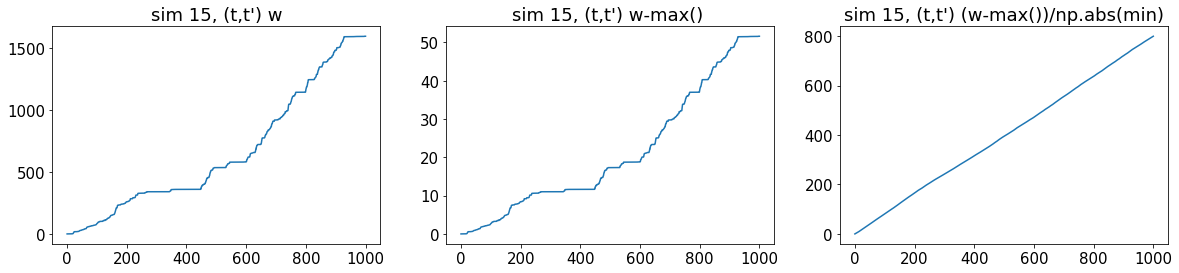

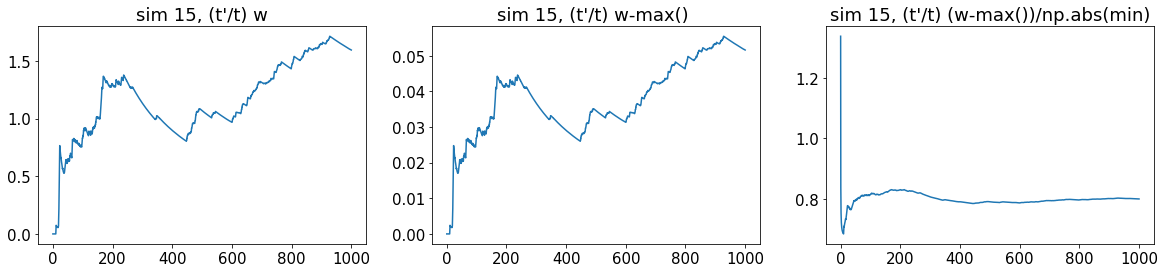

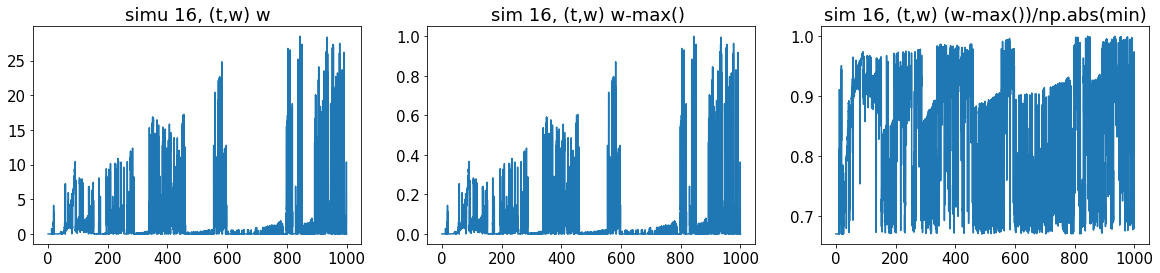

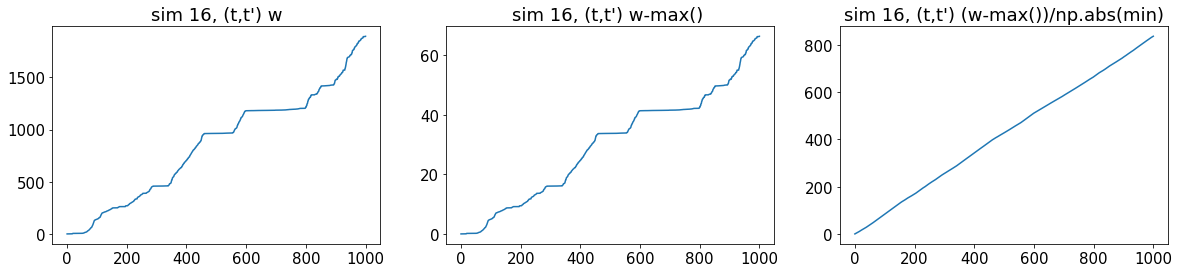

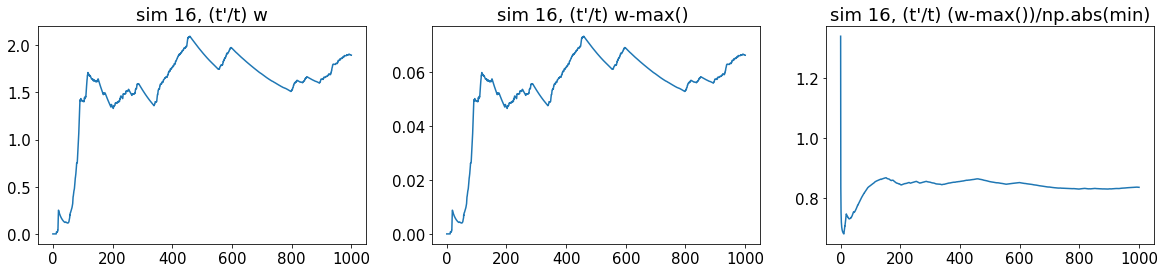

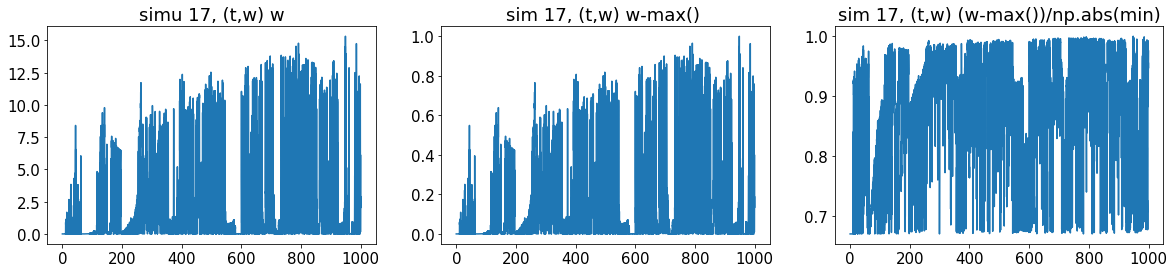

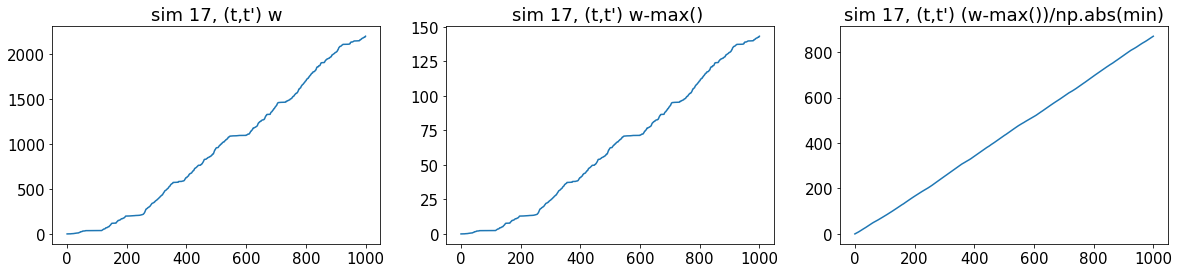

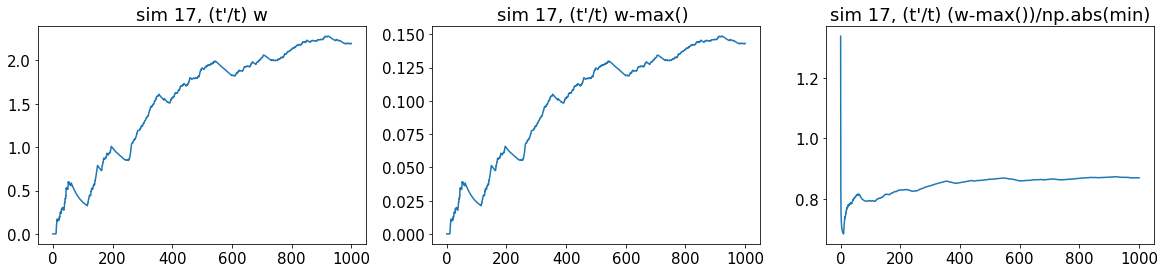

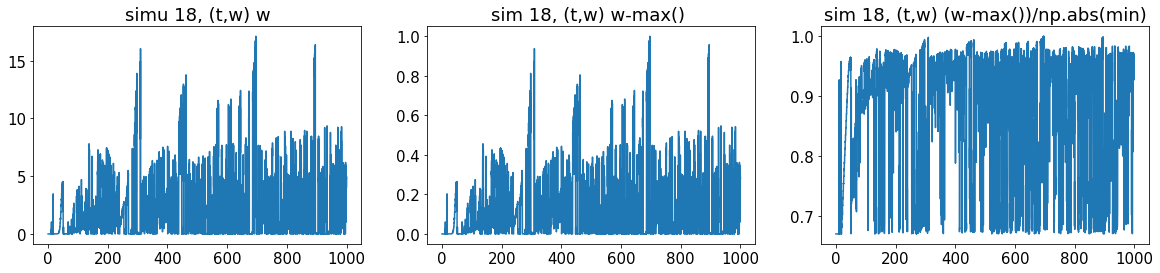

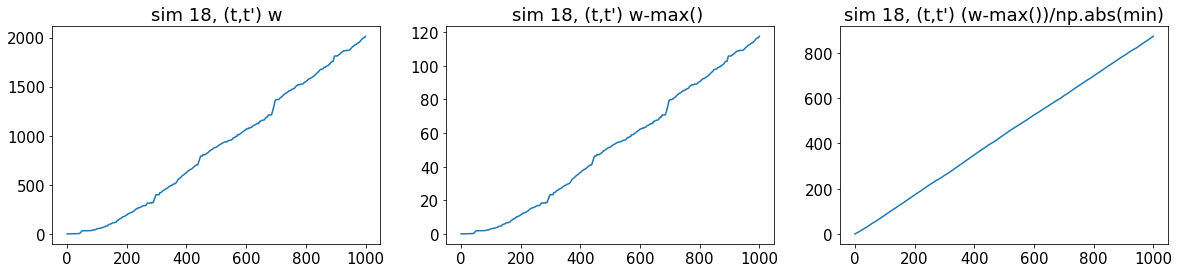

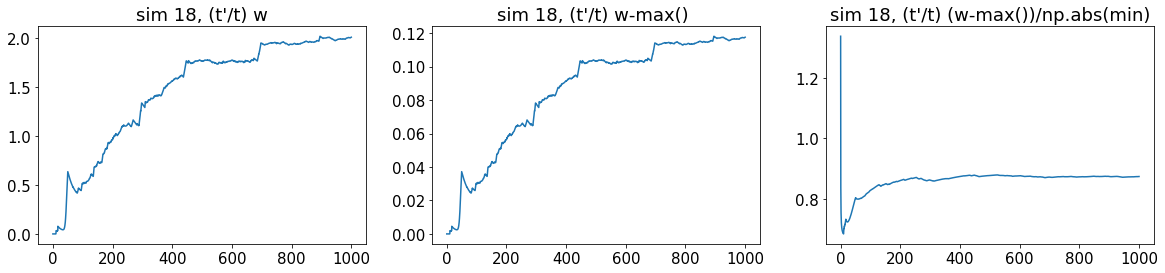

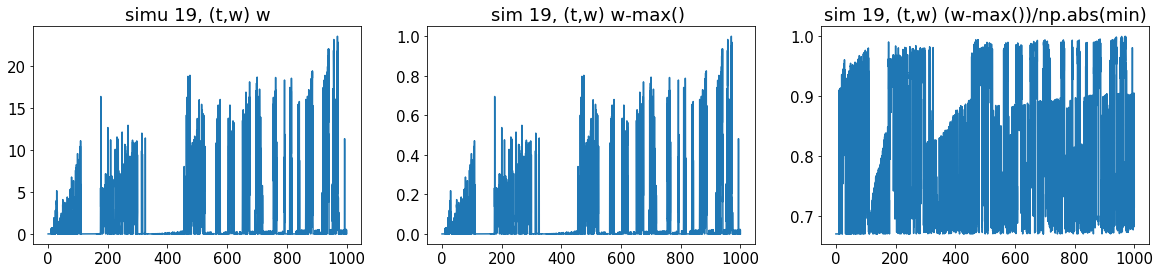

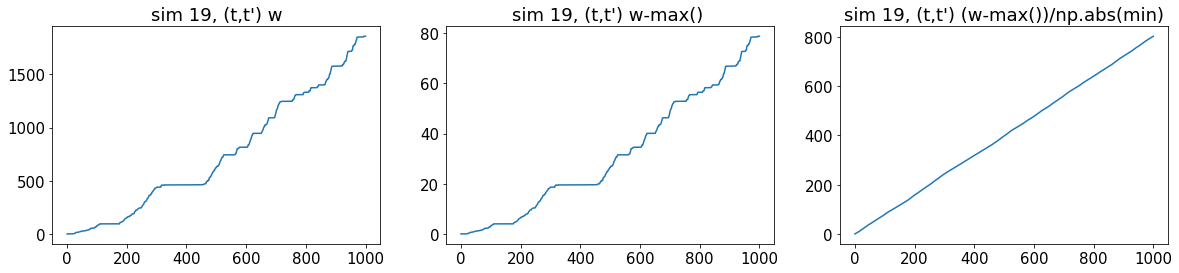

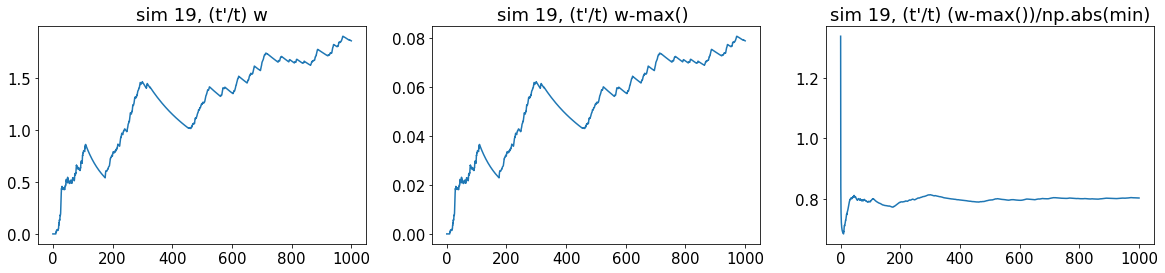

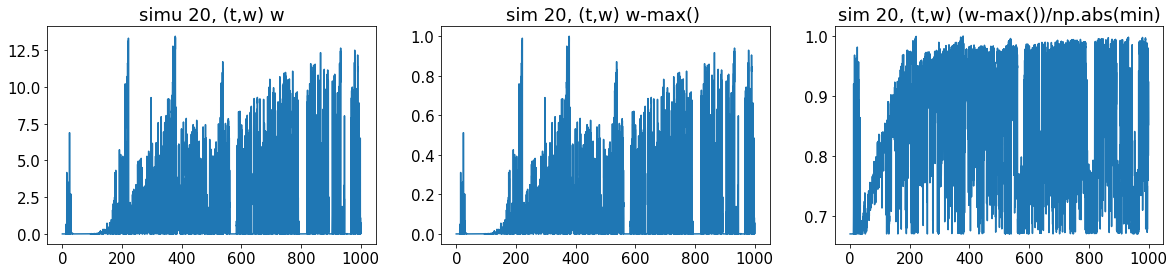

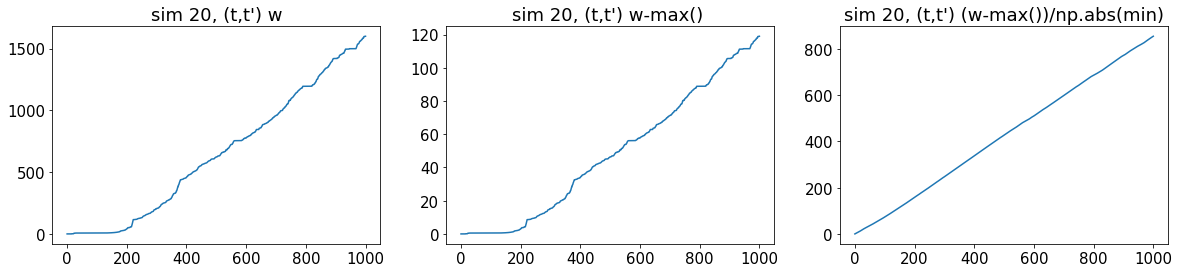

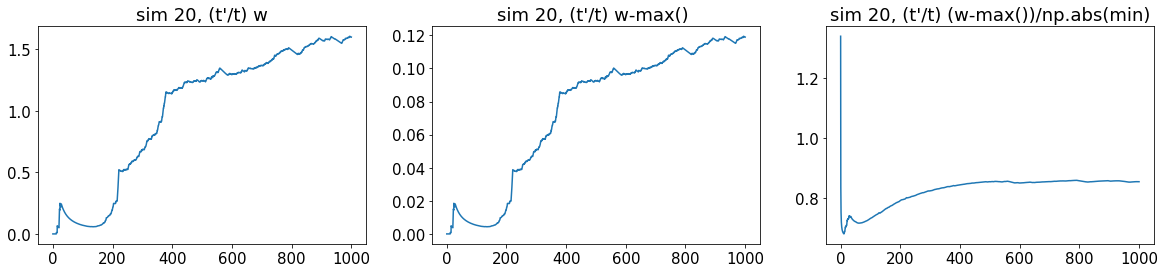

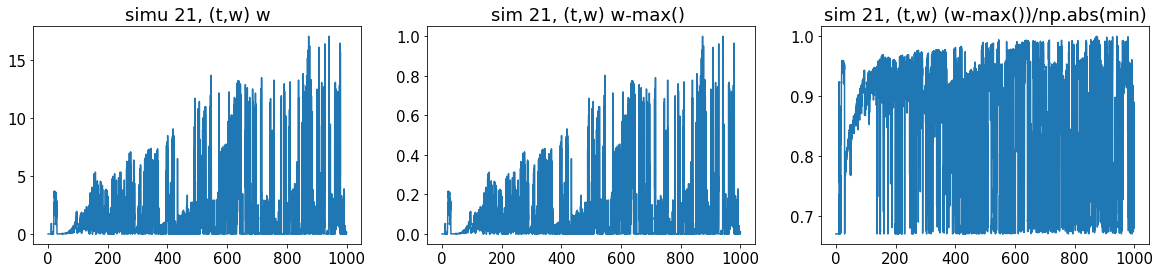

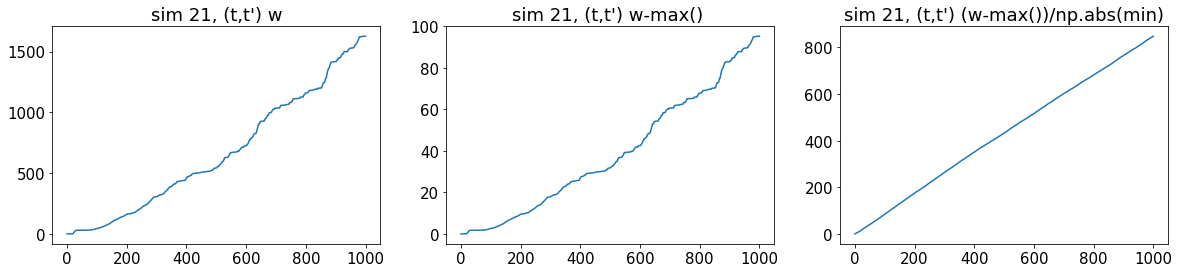

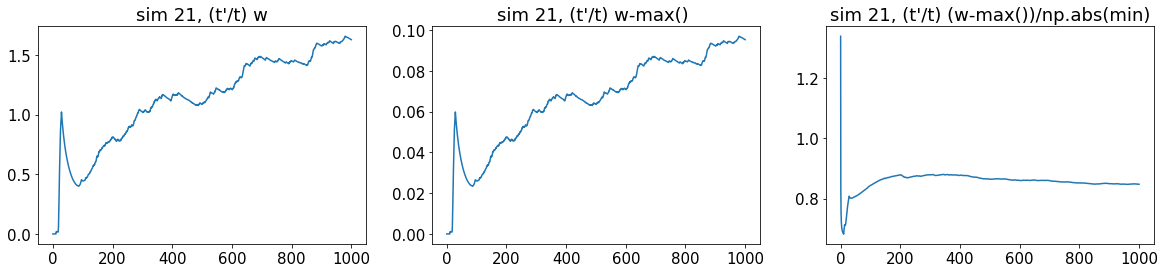

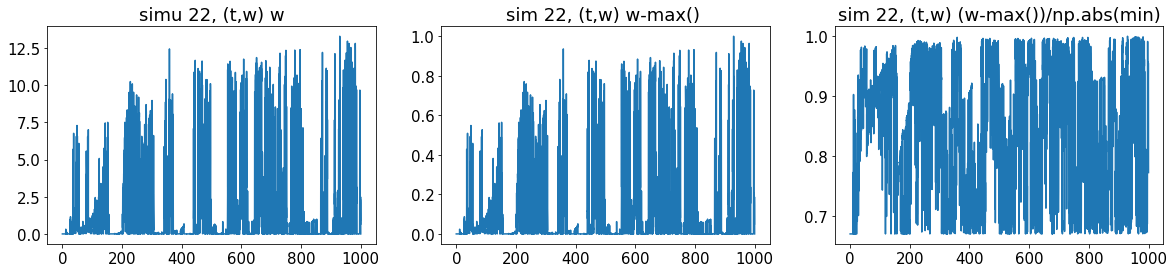

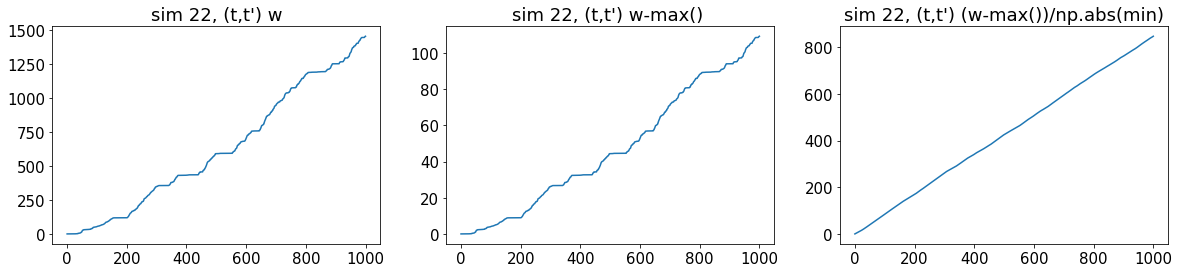

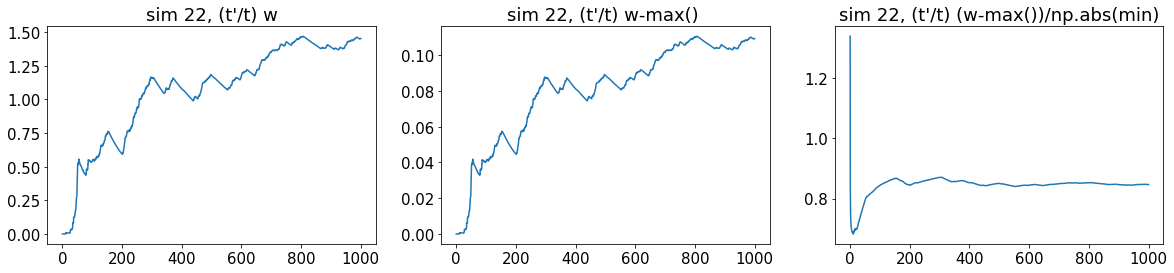

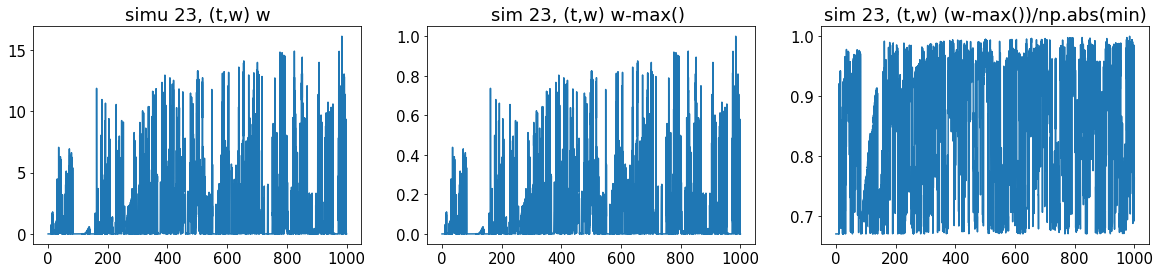

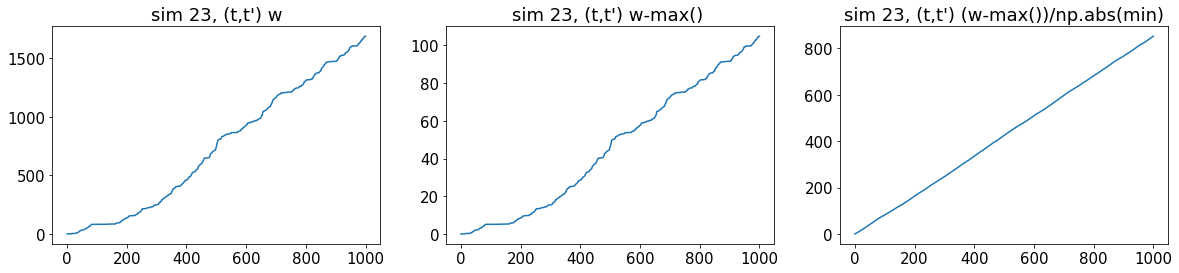

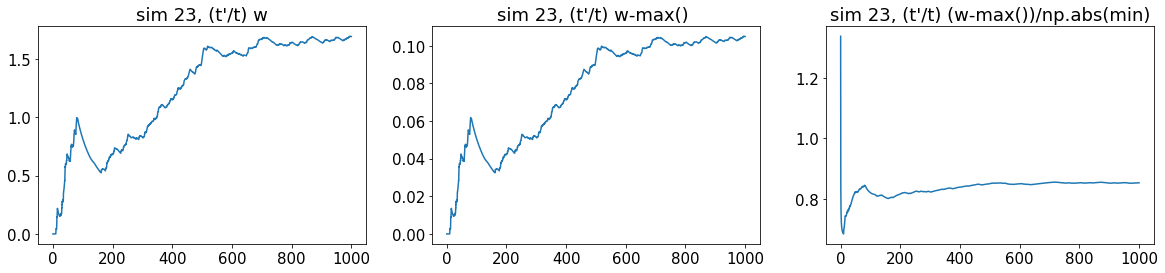

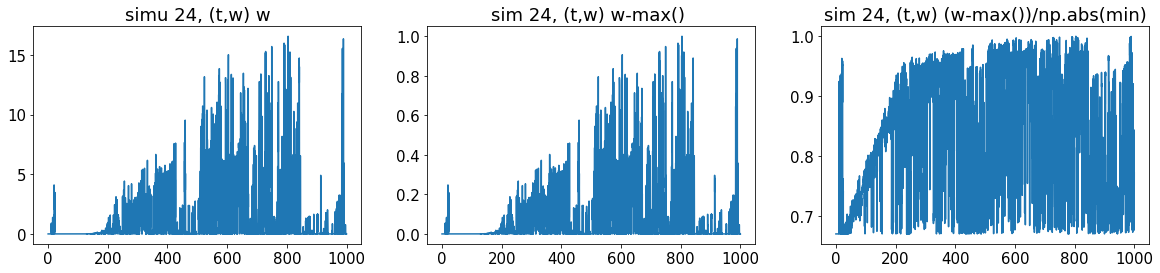

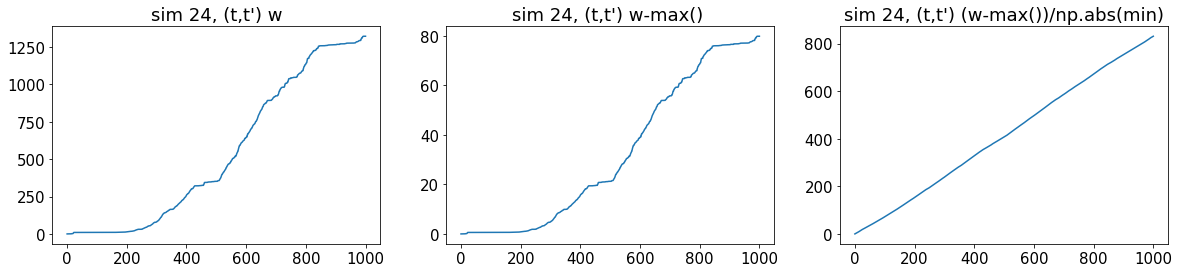

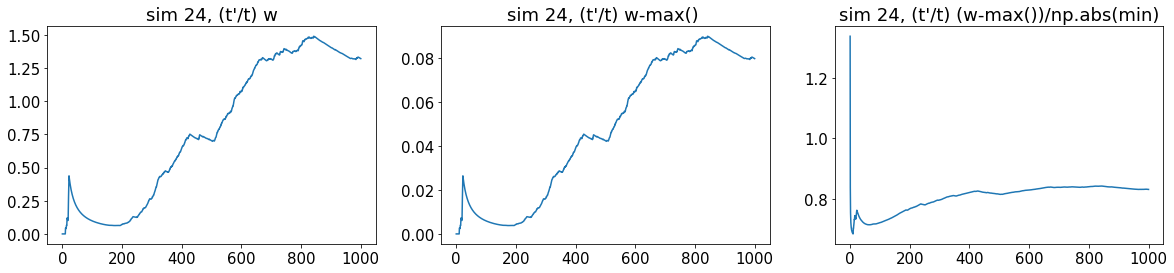

In [24]:
for k,set in enumerate(List): 

    fig,axs1 = plt.subplots(1,3,figsize=(25,4))
    fig,axs2 = plt.subplots(1,3,figsize=(25,4))
    fig,axs3 = plt.subplots(1,3,figsize=(25,4))
    fig,axs4 = plt.subplots(1,3,figsize=(25,4))
     
    data = load_dataframe(set+"COLVAR")
    X = data[descriptors_names].values
    if k != 0:
        logweight = data["opes.bias"].to_numpy()*sim_parameters["beta"]
        t = data['time'].values-1000*k
    else: 
        logweight = np.zeros(X.shape[0])
        t = data['time'].values
    dt = t[1]-t[0]
    tprime = dt * np.cumsum(np.exp(logweight))
    axs1[0].plot(t,np.exp(logweight))
    axs1[0].set_title("sim"+str(k)+",(w,t) w")
    axs2[0].plot(t,tprime)
    axs2[0].set_title("sim"+str(k)+", (t',t) w")
    axs3[0].plot(t[1:],tprime[1:]/t[1:])
    axs3[0].set_title("sim"+str(k)+", (t'/t, t) w")
    logweight -= max(logweight)
    tprime = dt * np.cumsum(np.exp(logweight))
    axs1[1].plot(t,np.exp(logweight))
    axs1[1].set_title("sim"+str(k)+",(w,t) w-max()")
    axs2[1].plot(t,tprime)
    axs2[1].set_title("sim"+str(k)+",(t',t) w-max()")
    axs3[1].plot(t[1:],tprime[1:]/t[1:])
    axs3[1].set_title("sim"+str(k)+",(t'/t,t) w-max()")
    if k != 0:
        logweight = data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy())
        logweight /= np.abs(np.min(logweight))
    else: 
        logweight = np.zeros(X.shape[0])
    logweight *= sim_parameters["beta"]
    tprime = dt * np.cumsum(np.exp(logweight))
    axs1[2].plot(t,np.exp(logweight))
    axs1[2].set_title("sim"+str(k)+",(w,t) (w-max())/np.abs(min)")
    axs2[2].plot(t,tprime)
    axs2[2].set_title("sim"+str(k)+",(t',t) (w-max())/np.abs(min)")
    axs3[2].plot(t[1:],tprime[1:]/t[1:])
    axs3[2].set_title("sim"+str(k)+",(t'/t,t) (w-max())/np.abs(min)")

    #-- trajectories in phi / psi --#
    data.plot.scatter(y="psi",x="phi",ax=ax)
    fes = np.loadtxt("../../../angles/fes.txt",delimiter=" ")
    grid0 = np.loadtxt("../../../angles/grid0.txt",delimiter=" ")
    grid1 = np.loadtxt("../../../angles/grid1.txt",delimiter=" ")
    bounds = np.arange(0, 60, 5.)
    for i in range(3):
        c = axs4[i].contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
            norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
        )
        c.clabel()
        axs4[i].grid()
        axs4[i].set_title("simulation "+str(k))
        axs4[i].set_xlabel(r"$\phi$")
        axs4[i].set_ylabel(r"$\psi$")
    plt.tight_layout()
    

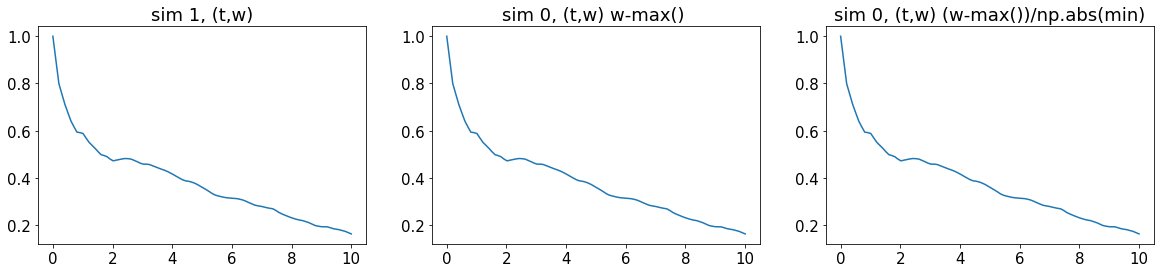

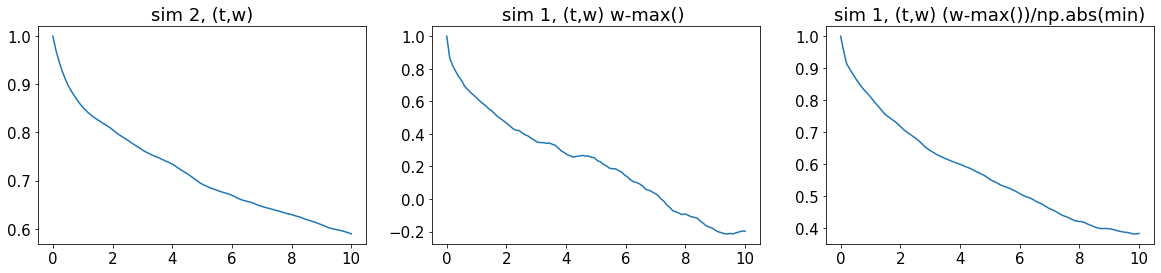

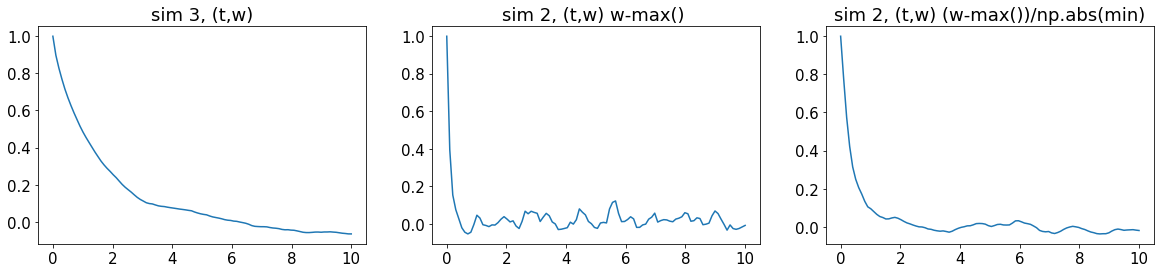

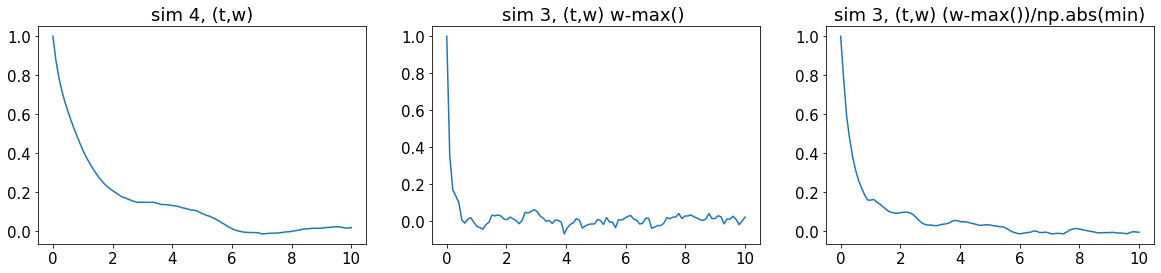

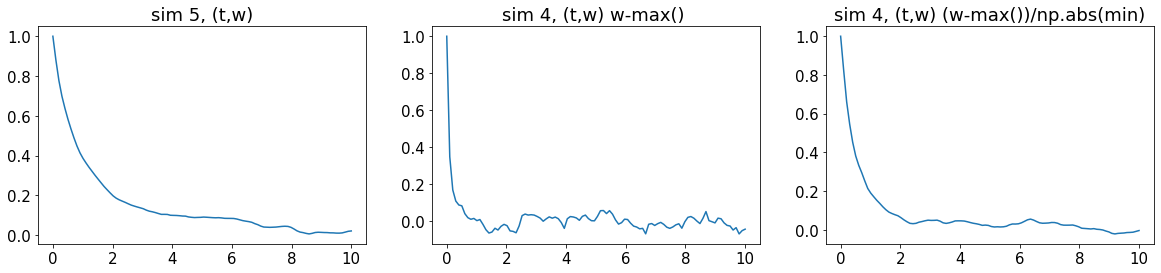

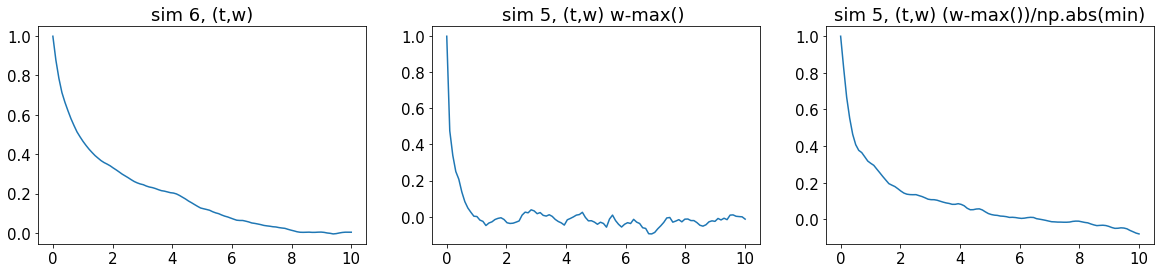

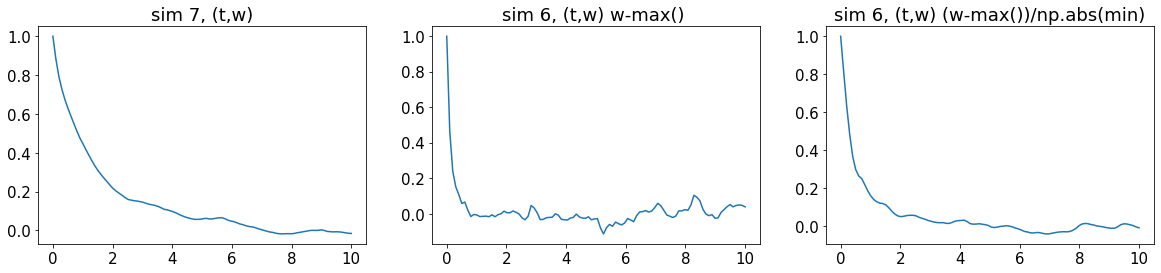

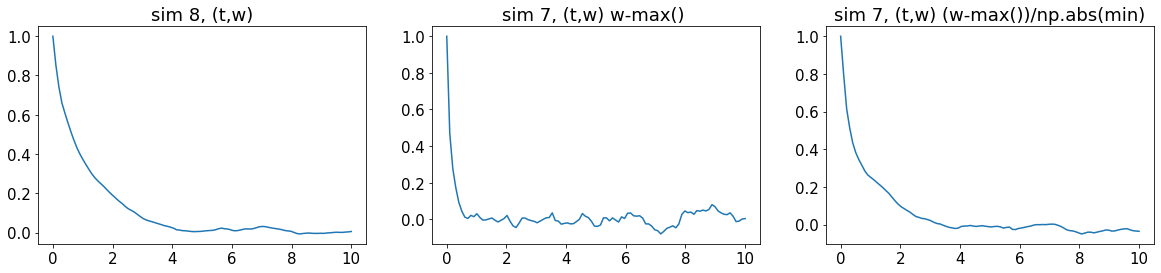

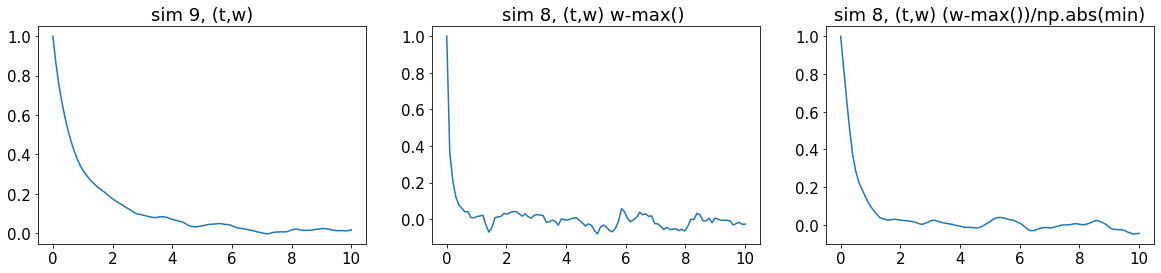

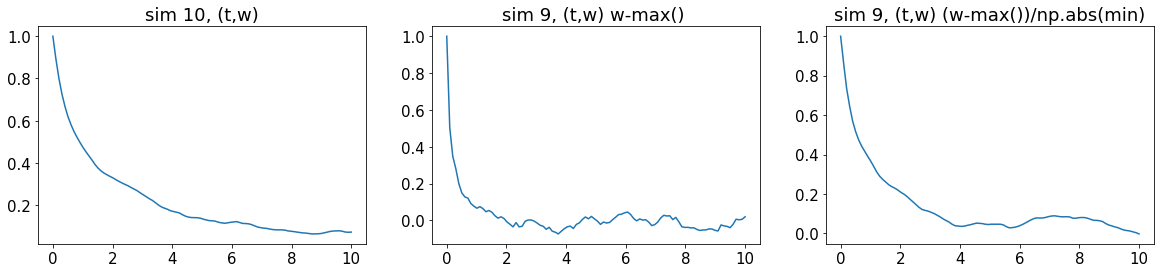

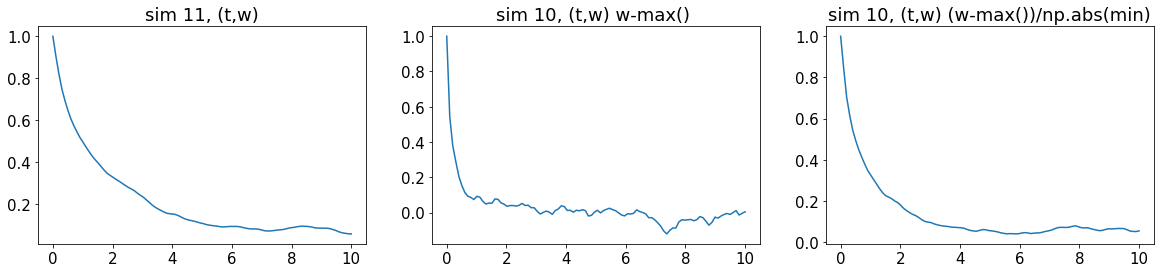

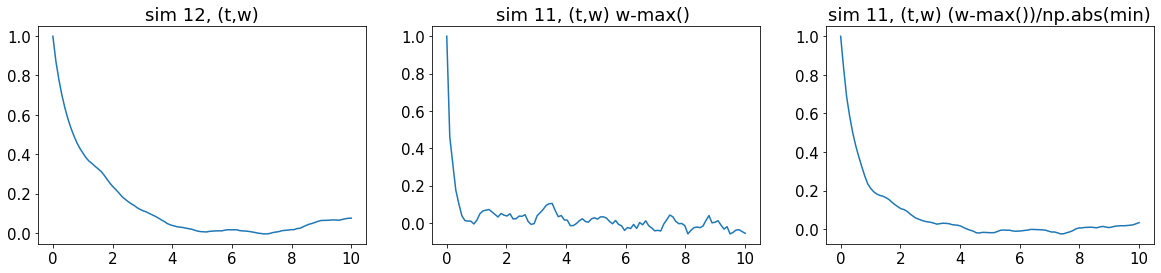

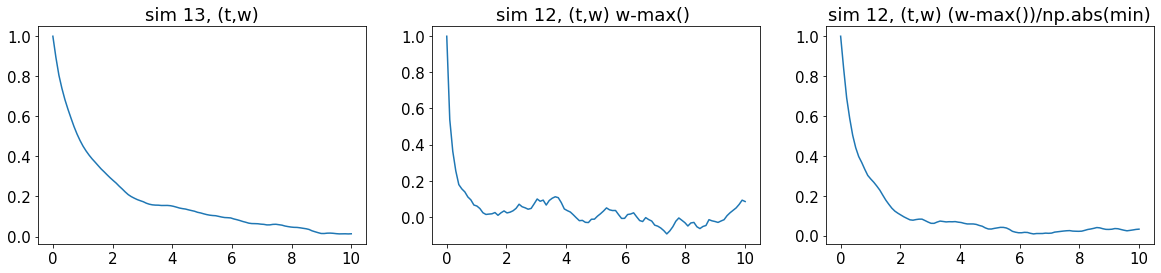

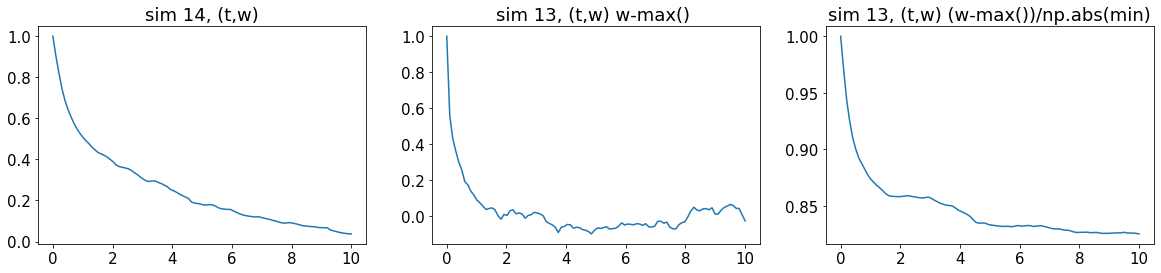

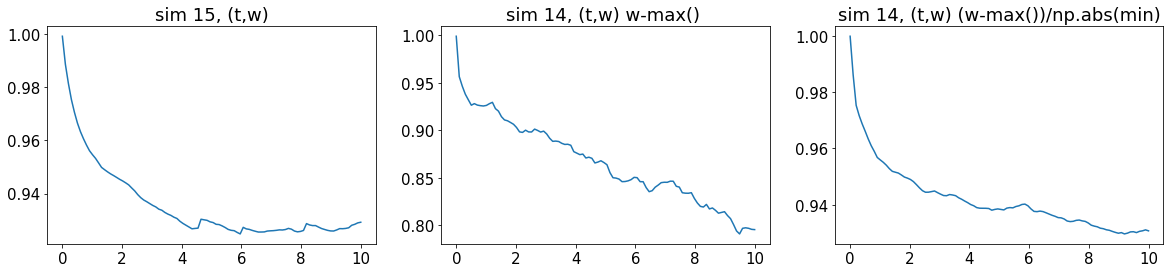

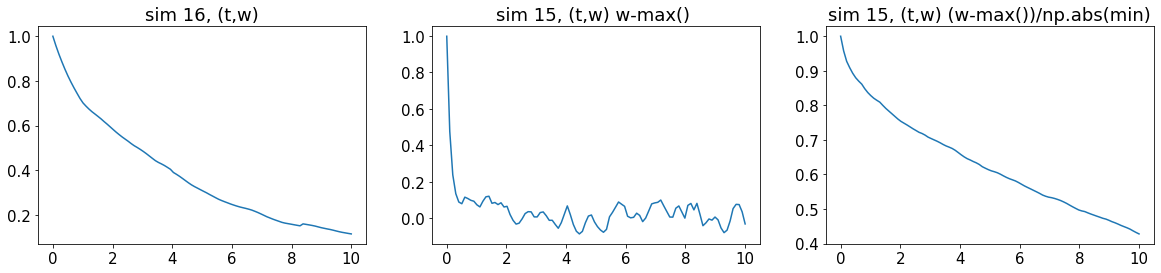

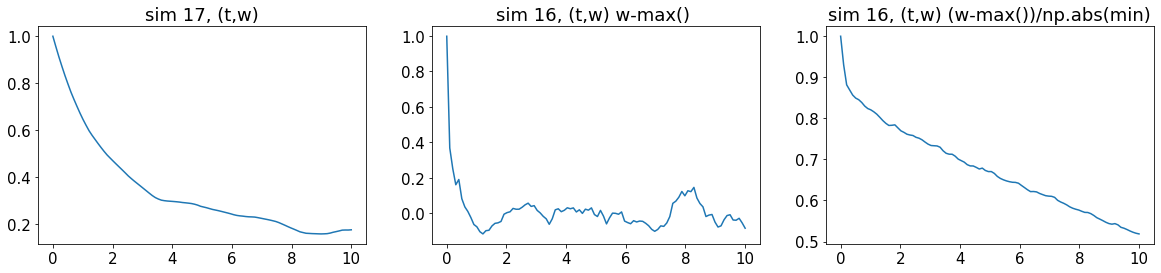

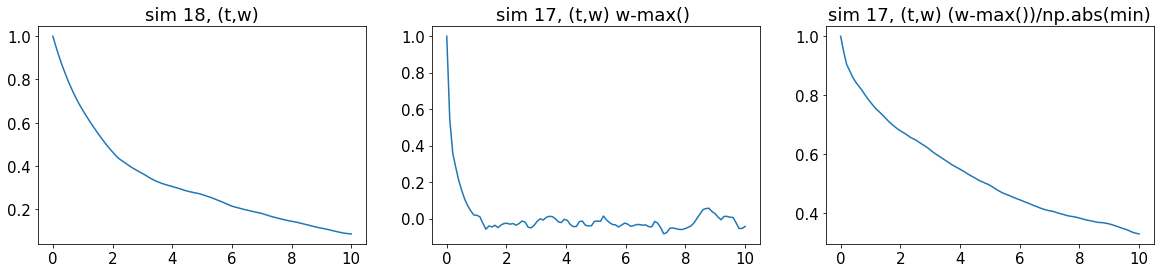

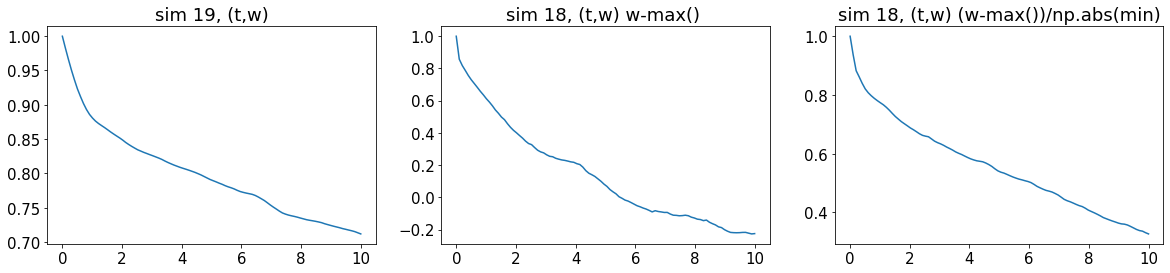

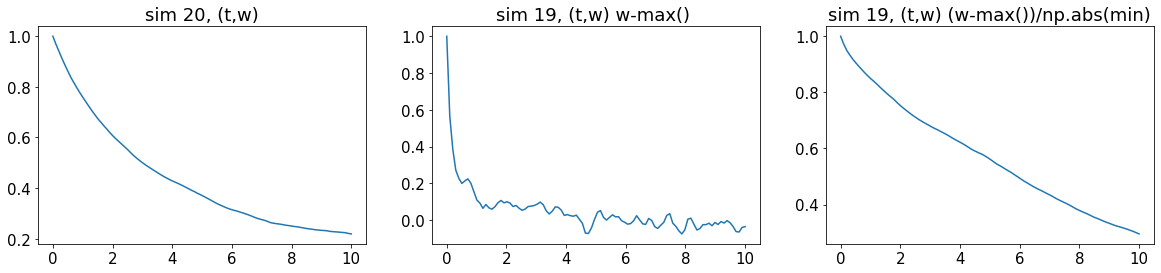

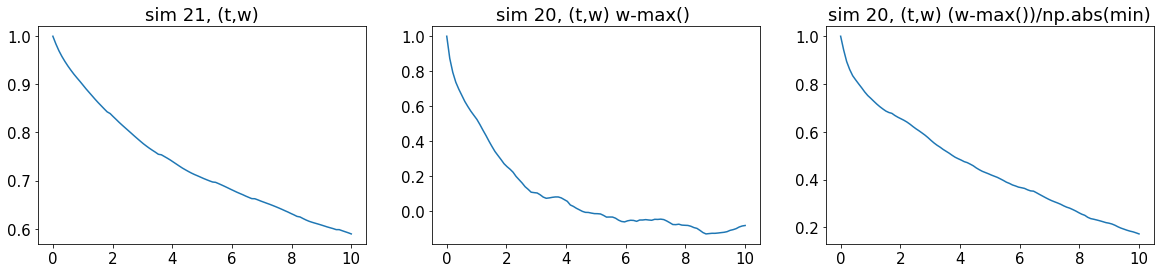

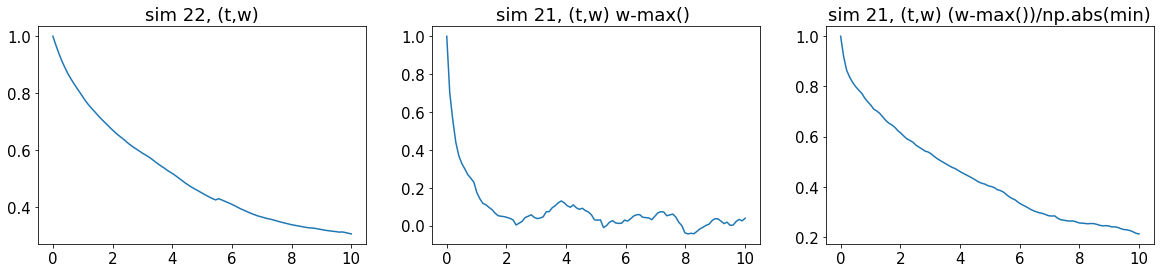

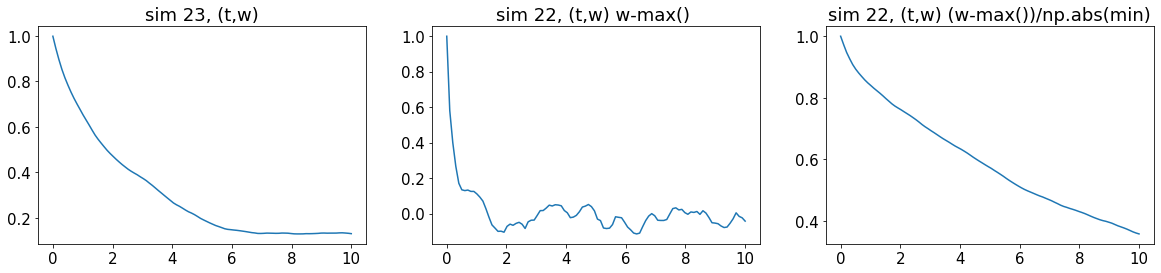

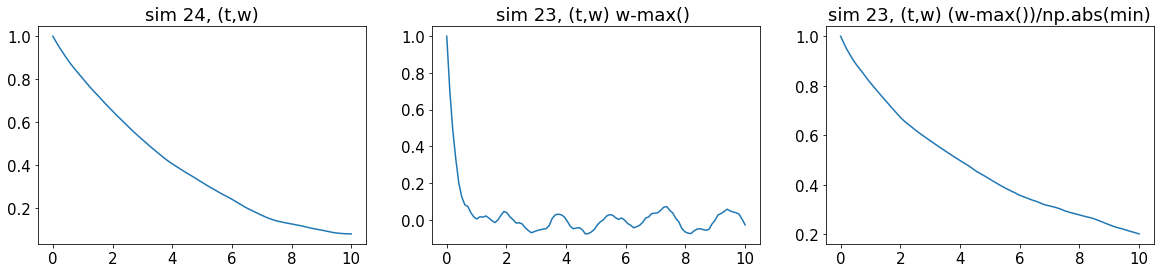

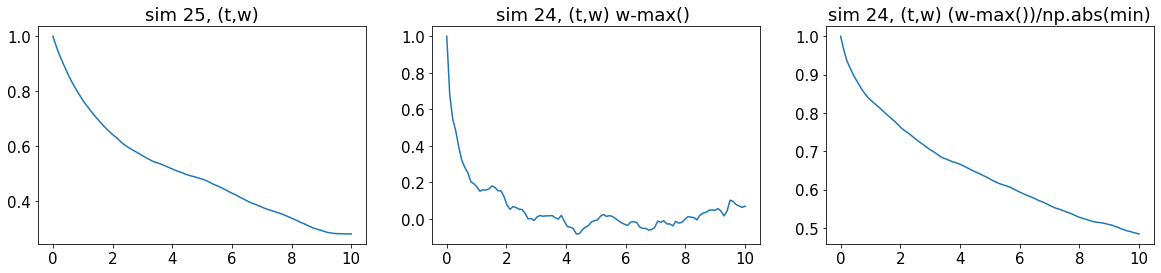

In [25]:
for k,set in enumerate(List): 

    fig,axs1 = plt.subplots(1,3,figsize=(20,4))
    data = load_dataframe(set+"COLVAR")
    t = data['time'].values
    X = data[descriptors_names].values
    if k != 0:
        logweight = data["opes.bias"].to_numpy()*sim_parameters["beta"]
    else: 
        logweight = np.zeros(X.shape[0])
    dt = t[1]-t[0]
    tprime = dt * np.cumsum(np.exp(logweight))
    x = data["phi"].values
    #-- without minus max --#
    autocorr = np.empty(0)
    N = 100
    lags = np.linspace(0,10,N)
    for lag in lags:
        res = my_autocorrelation_python(x,lag=lag,weight=np.exp(logweight),time=t, tprime=tprime)
        autocorr = np.append(autocorr,res)
    axs1[0].plot(lags,autocorr)
    axs1[0].set_title("sim "+str(k+1)+", (t,w)")
    #-- with minus max --#
    autocorr = np.empty(0)
    logweight -= max(logweight)
    tprime = dt * np.cumsum(np.exp(logweight))
    for lag in lags:
        res = my_autocorrelation_python(x,lag=lag,weight=np.exp(logweight),time=t, tprime=tprime)
        autocorr = np.append(autocorr,res)
    axs1[1].plot(lags,autocorr)
    axs1[1].set_title("sim "+str(k)+", (t,w) w-max() ")
    #-- with minus max and / np.abs(min)--#
    if k != 0:
        logweight = data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy())
        logweight /= np.abs(np.min(logweight))
    else: 
        logweight = np.zeros(X.shape[0])
    autocorr = np.empty(0)
    logweight *= sim_parameters["beta"]
    tprime = dt * np.cumsum(np.exp(logweight))
    for lag in lags:
        res = my_autocorrelation_python(x,lag=lag,weight=np.exp(logweight),time=t, tprime=tprime)
        autocorr = np.append(autocorr,res)
    axs1[2].plot(lags,autocorr)
    axs1[2].set_title("sim "+str(k)+", (t,w) (w-max())/np.abs(min)")

In [ ]:
# variance and mean of cvs
for k,set in enumerate(List[1:]):
    data = load_dataframe(set+"COLVAR")
    cv = data["deep"+str(k)+".node-0"].values
    logweight = data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy())*sim_parameters["beta"]
    mean = np.average(cv)#,weights=np.exp(logweight))
    variance = np.cov(cv)#,aweights=np.exp(logweight))
    print("average: ", mean, "\tvariance: ", variance)

In [ ]:
'''
# cvs isolines, after simulations
for k,set in enumerate(List[1:]):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    data = load_dataframe(set+"COLVAR")
    data.plot.hexbin(y="psi",x="phi",C="deep"+str(k)+".node-0",cmap="Set1",ax=ax)#,ax=axs[k])

    fes = np.loadtxt("../../../angles/fes.txt",delimiter=" ")
    grid0 = np.loadtxt("../../../angles/grid0.txt",delimiter=" ")
    grid1 = np.loadtxt("../../../angles/grid1.txt",delimiter=" ")
    bounds = np.arange(0, 60, 5.)
    c = ax.contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c.clabel()
    ax.grid()
    ax.set_title(set)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    plt.tight_layout()
'''

In [ ]:
# cvs isolines, before simulations
for k,set in enumerate(List[:]):

    data = load_dataframe(set+"COLVAR")
    model = DeepTICA_CV([len(descriptors_names),30,30,2],activation='tanh')
    model.load_checkpoint(set+"deeptica/model_checkpoint.pt")
    X = data[descriptors_names].to_numpy()
    data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
    data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]

    fig,axs = plt.subplots(1,2,figsize=(12,4),sharey=True)
    data.plot.hist(y="cv1",bins=20,ax=axs[0],density=True,color="b")
    data.plot.hist(y="cv2",bins=20,ax=axs[1],density=True,color="b")

    fig,ax = plt.subplots(1,2,figsize=(12,6))
    data.plot.hexbin(y="psi",x="phi",C="cv1",cmap="Set1",ax=ax[0])#,ax=axs[k])
    data.plot.hexbin(y="psi",x="phi",C="cv2",cmap="Set1",ax=ax[1])

    fes = np.loadtxt("../../../angles/fes.txt",delimiter=" ")
    grid0 = np.loadtxt("../../../angles/grid0.txt",delimiter=" ")
    grid1 = np.loadtxt("../../../angles/grid1.txt",delimiter=" ")
    bounds = np.arange(0, 60, 5.)
    c = ax[0].contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c = ax[1].contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c.clabel()
    ax[0].grid()
    ax[0].set_title("simulation "+str(k))
    ax[0].set_xlabel(r"$\phi$")
    ax[0].set_ylabel(r"$\psi$")
    ax[1].grid()
    ax[1].set_title("simulation "+str(k))
    ax[1].set_xlabel(r"$\phi$")
    ax[1].set_ylabel(r"$\psi$")
    plt.tight_layout()

In [ ]:
# cvs isolines, on all psi-phi space before bias simulations
#fig,axs = plt.subplots(1,3,figsize=(20,8))
for k,set in enumerate(List[:]):
    
    model = DeepTICA_CV([len(descriptors_names),30,30,2],activation='tanh')
    model.load_checkpoint(set+"deeptica/model_checkpoint.pt")
    data_complete = load_dataframe("../../../angles/COLVAR")
    X_complete = data_complete[descriptors_names].to_numpy() 
    data_complete["cv1"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[0]
    data_complete["cv2"] = np.transpose(model(torch.Tensor(X_complete)).detach().cpu().numpy())[1]   

    fig,ax = plt.subplots(1,2,figsize=(12,6))
    data_complete.plot.hexbin(y="psi",x="phi",C="cv1",cmap="Set1",ax=ax[0])#,ax=axs[k])
    data_complete.plot.hexbin(y="psi",x="phi",C="cv2",cmap="Set1",ax=ax[1])

    fes = np.loadtxt("../../../angles/fes.txt",delimiter=" ")
    grid0 = np.loadtxt("../../../angles/grid0.txt",delimiter=" ")
    grid1 = np.loadtxt("../../../angles/grid1.txt",delimiter=" ")
    bounds = np.arange(0, 60, 5.)
    c = ax[0].contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c = ax[1].contour(grid0, grid1, fes, bounds, linewidths=3,cmap="gray",linestyles="dashed",
        norm = mpl.colors.BoundaryNorm(bounds, ncolors=len(bounds)-1, clip=False), label="FES [Kj/mol]",
    )
    c.clabel()
    ax[0].grid()
    ax[0].set_title("simulation "+str(k))
    ax[0].set_xlabel(r"$\phi$")
    ax[0].set_ylabel(r"$\psi$")
    ax[1].grid()
    ax[1].set_title("simulation "+str(k))
    ax[1].set_xlabel(r"$\phi$")
    ax[1].set_ylabel(r"$\psi$")
    plt.tight_layout()

In [ ]:
# different loss functions and trainigs
for k,set in enumerate(List[:]):
    
    model = DeepTICA_CV([len(descriptors_names),30,30,2],activation='tanh')
    model.load_checkpoint(set+"deeptica/model_checkpoint.pt")
    fig, ax = plt.subplots(1,1,figsize=(6,4))#,dpi=100)
    plot_model_lossfunction(model,only_loss=ax)
    ax.set_title("simulation "+str(k))

plt.tight_layout()

In [ ]:
#-- estimation of Free Energy Surface --#
for k,set in enumerate(List[1:]):
    
    data = load_dataframe(set+"COLVAR")
    s = data.filter(regex="^p").to_numpy()
    logweight=( data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy()) )*sim_parameters["beta"]

    fig, ax = plt.subplots(figsize=(6,4))
    for i in range(2):
        fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                            temp=sim_parameters["temp"],
                                            kbt=sim_parameters["kbt"],
                                            blocks=sim_parameters["blocks"],
                                            bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                            plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
    ax.legend([r"$F(\phi)$ estimate",r"$F(\psi)$ estimate"])   
    ax.grid()
    plt.tight_layout()
    ax.set_title("simulation "+str(k))
    ax.set_xlabel(r"$(\phi,\psi)$")
    ax.set_ylabel("FES [Kj/mol]")

    plt.show()

In [ ]:
# load model from folder
#X, t, logweight = data[descriptors_names].values, data['time'].to_numpy(). data["opes.bias"].to_numpy()
#logweight = ( logweight-max(logweight) ) / sim_parameters["temp"]

In [ ]:
# Pearson correlations
'''
for k,set in enumerate(List[:-1]):

    data = load_dataframe(set+"COLVAR")
    model = DeepTICA_CV([len(descriptors_names),30,30,2],activation='tanh')
    model.load_checkpoint(set+"deeptica/model_checkpoint.pt")
    X = data[descriptors_names].to_numpy()
    data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
    data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]

    fig,axs = plt.subplots(2,1,figsize=(16,12),sharex=True)
    for k,cv in enumerate(["cv1","cv2"]):
        cols = [cv]
        cols.extend(data[descriptors_names].columns)
        corr = data[cols].corr(method='pearson')
        corr[cv].drop(cv).plot(kind='bar', ax=axs[k], rot=35, color="b",label=r"$C(deep|desc)$")
        axs[k].set_title('Correlation with DeepTICA '+str(k+1))
    plt.tight_layout()
    plt.show()
'''

### FES estimate from cvs  
Obviously from this first simulation it is not possible to found a cvs that from data are able to distinguish all the possible basins. I recall that our approach is a **data drive approach**.  


In [ ]:
#-- estimation of Free Energy Surface --#
for k,set in enumerate(List[1:]):

    data = load_dataframe(set+"COLVAR")
    model = DeepTICA_CV([len(descriptors_names),30,30,2],activation='tanh')
    model.load_checkpoint(set+"deeptica/model_checkpoint.pt")
    X = data[descriptors_names].to_numpy()
    data["cv1"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[0]
    data["cv2"] = np.transpose(model(torch.Tensor(X)).detach().cpu().numpy())[1]
    s = data.filter(regex="^cv").to_numpy()
    logweight=( data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy()) )*sim_parameters["beta"]
    
    fig, ax = plt.subplots(figsize=(6,6))
    for i in range(2):
        fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                            temp=sim_parameters["temp"],
                                            kbt=sim_parameters["kbt"],
                                            blocks=sim_parameters["blocks"],
                                            bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                            plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
    ax.legend(["F(cv1) estimate","F(cv2) estimate"])   
    ax.grid()
    plt.tight_layout()
    ax.set_title("simulation "+str(k))
    ax.set_xlabel(r"$(cv1,cv2)$")
    ax.set_ylabel("FES [Kj/mol]")

plt.show()

In [ ]:
# estimation of free energy difference along the biased cv0 --#
for k,set in enumerate(List[1:]):

    data = load_dataframe(set+"COLVAR")
    logweight=( data["opes.bias"].to_numpy()-max(data["opes.bias"].to_numpy()) )*sim_parameters["beta"]
    s = data["deep"+str(k)+".node-0"].values

    fes,grid,bounds,error = compute_fes(s, weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=1,
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=False)
    ind1 = (grid<0) 
    ind2 = (grid>0) 
    grid1 = grid[ ind1 ]
    grid2 = grid[ ind2 ] 
    I1 = integrate.trapz(np.exp(-fes[ind1]*sim_parameters["beta"]), grid1)
    I2 = integrate.trapz(np.exp(-fes[ind2]*sim_parameters["beta"]), grid2)
        
    res = (1/sim_parameters["beta"])*np.log(I1/I2)
    print("simulation "+str(k+1))
    print(np.abs(res))

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(14,10))#,sharey=True)
timescale = np.empty(len(List[1:]))
sims = []
for k,set in enumerate(List[1:]):
    data = load_dataframe(set+"COLVAR")
    #-- in ps --#
    last=150
    x = np.linspace(0,last+1,last)
    acorr = np.empty(last)
    
    for i in range(last):
        acorr[i] = data["deep"+str(k)+".node-0"].autocorr(i)
    axs[0].plot(x,acorr,label="sim"+str(k+1))
    timescale[k] = integrate.trapz(acorr[:last],x[:last])
    sims.append("sim"+str(k+1))

times = pd.DataFrame(sims,columns=["simulations"])
times["timescale"] = timescale
times.plot(kind="bar",x="simulations",y="timescale",rot=35,ax=axs[1],fontsize=15,label=r"$\xi$")

axs[0].set_xlabel(r'$\tau$')
axs[0].set_title(r'$C(\tau)$')
axs[1].set_title(r'$\xi=\int d\tau C(\tau)$')

plt.tight_layout()
plt.show()

print(np.max(timescale))
print(np.min(timescale))

In [ ]:
## attempt to obtain estimate of free energy from all the combined data
alldata = []
# I will not consider the unbias simulation for simplicity
for set in List[1:]:
    data = load_dataframe(set+"COLVAR")
    alldata.append(data)
alldata = pd.concat(alldata,ignore_index=True).replace(np.nan, 0)
# shuffle all datas
alldata = alldata.sample(frac=1)[::1]
len(alldata)

In [ ]:
# estimation of free energy in phi and psi
s = alldata.filter(regex="^p").to_numpy()
logweight=( alldata["opes.bias"].to_numpy()-max(alldata["opes.bias"].to_numpy()) )*sim_parameters["beta"]

fig, ax = plt.subplots(figsize=(6,6))
for i in range(2):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight),
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=sim_parameters["blocks"],
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=True, plot_max_fes=sim_parameters["plot_max_fes"], ax = ax)
ax.legend([r"$F(\phi)$ estimate",r"$F(\psi)$ estimate"])   
ax.grid()
plt.tight_layout()
ax.set_xlabel(r"$(\phi,\psi)$")
ax.set_ylabel("FES [Kj/mol]")

In [ ]:
res = 8.92808817900219
#-- each step is 1ps --#
#-- we are interested in the first 10 ns --#
#last = 1*1000*10 #last ns
#alldata = alldata[:last]
#-- with CLEAR set to 1000 I perform the estimation every ns --#
CLEAR=1000*5

deltaf = np.empty(0)
for el in np.arange(CLEAR,len(alldata)+CLEAR,CLEAR):
    s = alldata["phi"][:el].values
    weight = np.exp(logweight[:el])
    fes,grid,bounds,error = compute_fes(s, weights=weight,
                                        temp=sim_parameters["temp"],
                                        kbt=sim_parameters["kbt"],
                                        blocks=2,
                                        bandwidth=sim_parameters["bandwidth"],scale_by='range',
                                        plot=False)
    ind1 = (grid<0) 
    ind2 = (grid>0) 
    grid1 = grid[ ind1 ]
    grid2 = grid[ ind2 ] 
    I1 = integrate.trapz(np.exp(-fes[ind1]*sim_parameters["beta"]), grid1)
    I2 = integrate.trapz(np.exp(-fes[ind2]*sim_parameters["beta"]), grid2)
    
    deltaf = np.append(deltaf,(1/sim_parameters["beta"])*np.log(I1/I2))

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(np.arange(len(deltaf)),deltaf,label="Estimate")
res = np.full(len(deltaf),res)
err = np.full(len(deltaf),0.2*kb*sim_parameters["temp"])
ax.plot(np.arange(len(deltaf)),res,linestyle='--',linewidth=3,color="g",label="ref")
ax.fill_between(np.arange(len(deltaf)) , res-err, res+err , color="r",zorder=0,alpha=0.3)
ax.grid()
ax.legend()
ax.set_xlabel(r"$t$ [ps$\times$"+str(CLEAR/5)+"]")
ax.set_ylabel(r"$\Delta F$ [Kj/mol]")